In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2025-06-17_twoBunch_forMuons_6GeV.yml")

importedDefaultSettings = importedDefaultSettings | { "L3PhaseSet" : 0.0 } 

In [3]:
csrTF = False
evalElement = "PENT"



inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e3,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 1000.0
Beam created, written to /tmp/beams/activeBeamFile_9745160501422558091.h5, and reinit to tao


In [4]:
# OPTIONAL: disable all apertures. Very nonphysical, but I want to see if this solves some headaches
# totalNumElements = len(tao.lat_list("*", "ele.name"))
# for eleII in range(totalNumElements):
#     try:
#         tao.cmd(f"set ele {eleII} APERTURE_AT = NO_APERTURE")
#     except:
#         pass

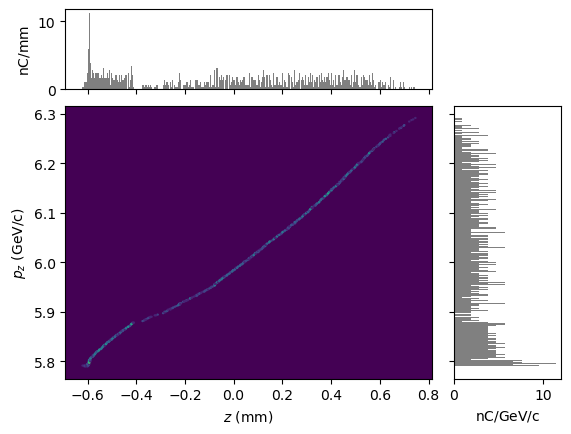

758.980920397577


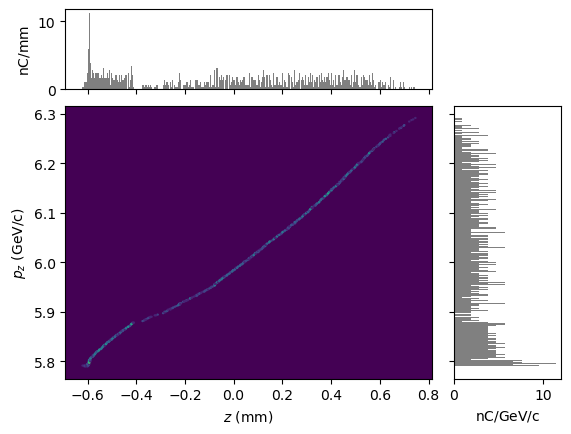

In [5]:
activeSettings = importedDefaultSettings | { "L1PhaseSet" : -20, "L2PhaseSet" : -45 }

setLattice(tao, **activeSettings)
trackBeam(tao, **activeSettings)
P = getBeamAtElement(tao, "BEGBC20")
display(plotMod(P, 'z', 'pz', bins=300))

PDrive, PWitness = getDriverAndWitness(P)
print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) ) 




In [6]:
results = []

for R56Set in np.arange( -20e-3, 20e-3, 0.1e-3):
    PMod = P.copy()
    
    meanPz = np.mean( PMod.pz ) 
    PMod.z = PMod.z + ( R56Set ) * ( PMod.pz - meanPz ) / meanPz
    
    #display(plotMod(PMod, 'z', 'pz', bins=300))
    #plt.clf()
    
    PDrive, PWitness = getDriverAndWitness(PMod)
    #print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) )

    results.append( [ R56Set, np.median(PDrive.z) - np.median(PWitness.z) ] ) 

[-0.017900000000000013, 4.159353604841817e-05]


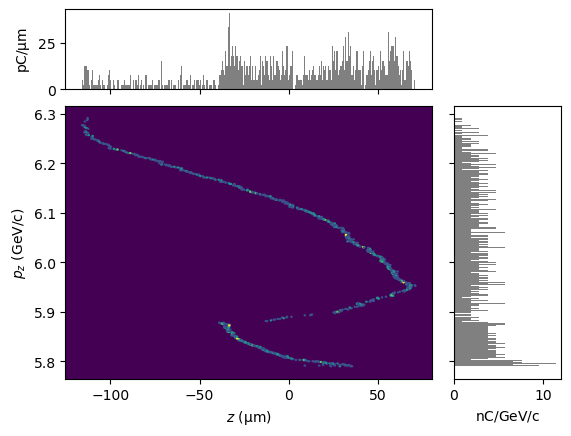

In [7]:
targetSpacing = 40e-6
bestResult = min(results, key=lambda x: ( x[1] - targetSpacing ) ** 2)
print(bestResult)
bestR56 = bestResult[0]


PMod = P.copy()
    
meanPz = np.mean( PMod.pz ) 
PMod.z = PMod.z + ( bestR56 ) * ( PMod.pz - meanPz ) / meanPz

display(plotMod(PMod, 'z', 'pz', bins=300))
plt.clf()


## Automate

-40 -50
[-0.02, 3.1541150809377846e-05]
1.6007072e-09


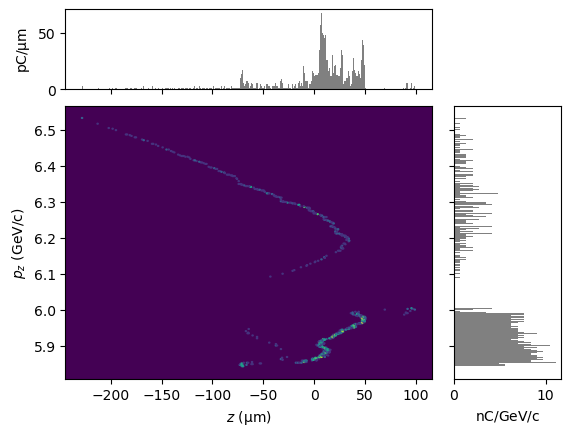

-40 -48
[-0.01870000000000001, 4.045990863221069e-05]
1.6007072e-09


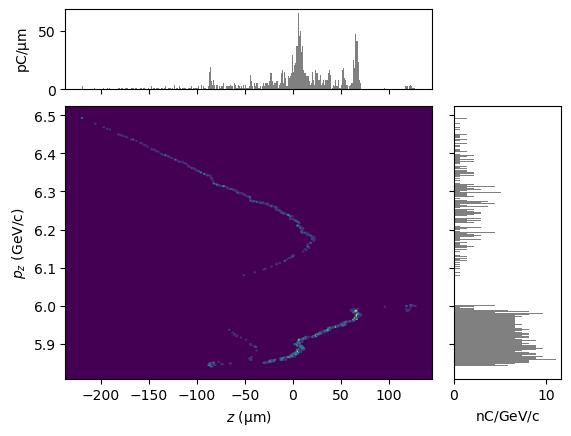

-40 -46
[-0.017100000000000018, 3.987015244920591e-05]
1.6007072e-09


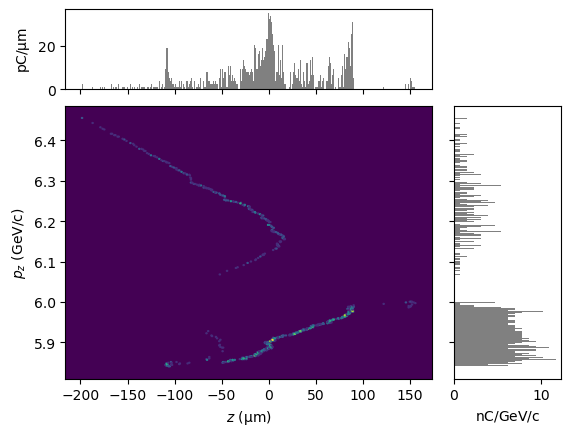

-40 -44
[-0.015400000000000028, 3.9730215987979266e-05]
1.6007072e-09


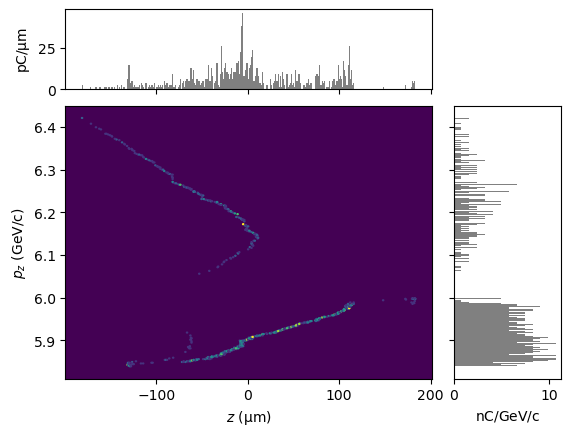

-40 -42
[-0.01350000000000004, 3.994041329178147e-05]
1.6007072e-09


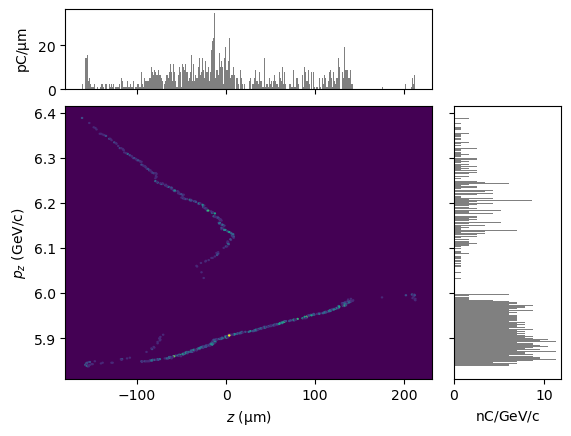

-40 -40
[-0.011400000000000052, 3.982057410811598e-05]
1.6007072e-09


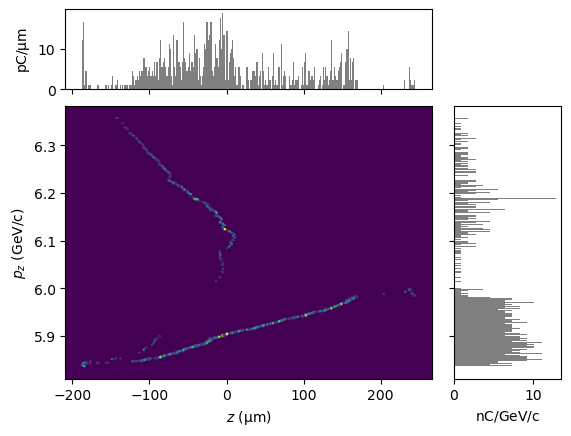

-40 -38
[-0.009400000000000065, 4.200583127890803e-05]
1.6007072e-09


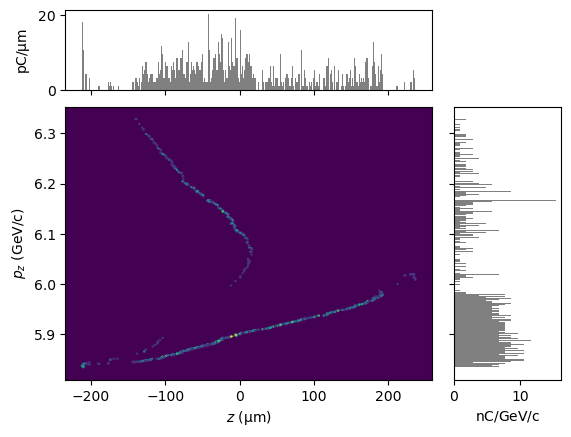

-40 -36
[-0.007400000000000077, 3.828526694058821e-05]
1.6007072e-09


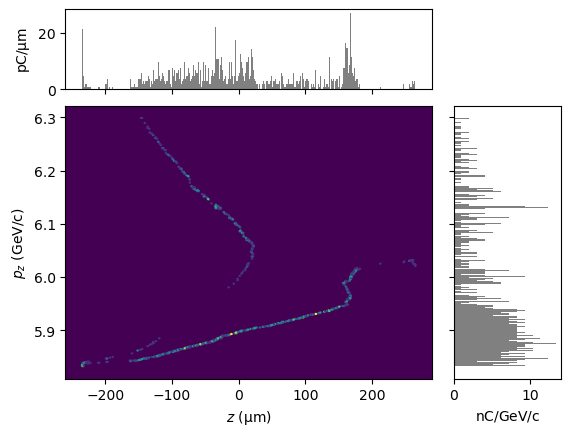

-40 -34
[-0.005100000000000091, 3.9182413985892556e-05]
1.6007072e-09


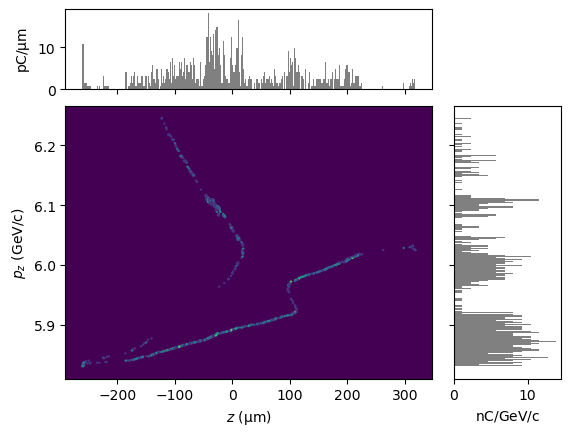

-40 -32
[-0.002200000000000108, 4.0663337527516285e-05]
1.6007072e-09


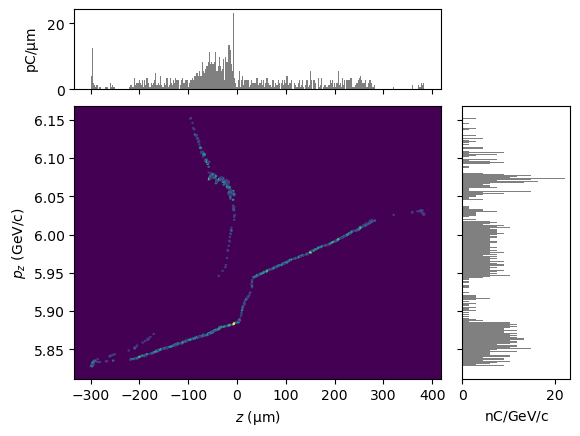

-40 -30
[0.0022999999999998647, 4.032309047061171e-05]
1.6007072e-09


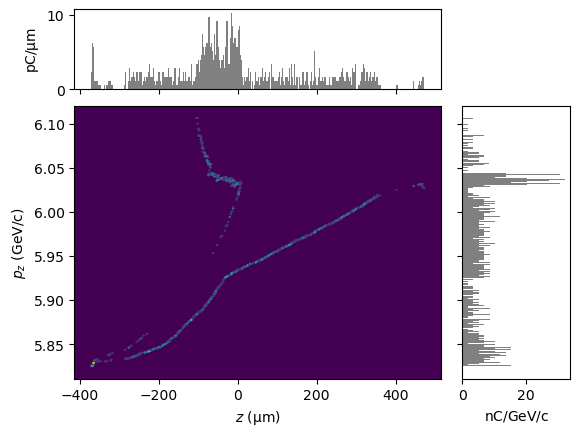

-40 -28
[0.010999999999999812, 3.9524467771649116e-05]
1.6007072e-09


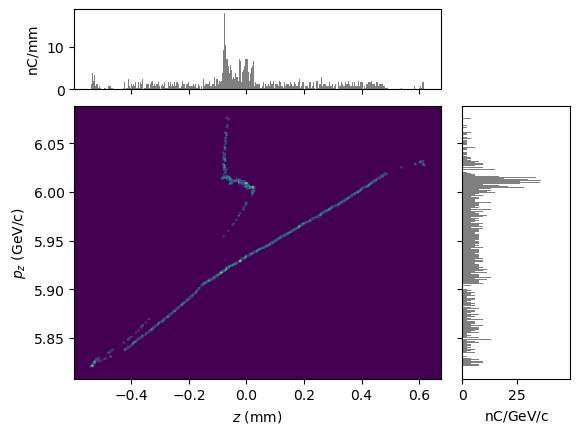

-40 -26
-40 -24
-40 -22
-40 -20
-40 -18
-40 -16
-40 -14
-40 -12
-40 -10
-40 -8
-40 -6
-40 -4
-40 -2
-38 -50
[-0.01850000000000001, 4.0178052598607145e-05]
1.6007072e-09


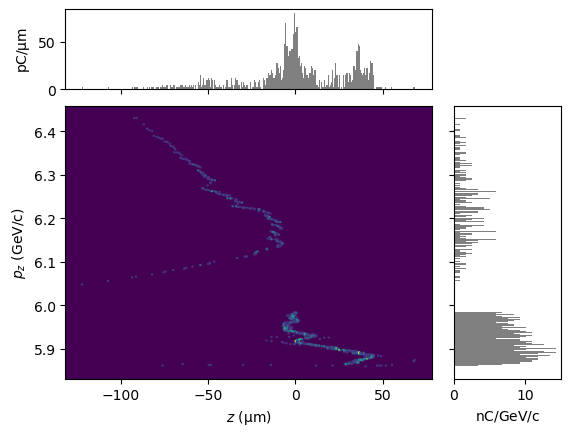

-38 -48
[-0.01670000000000002, 4.127207668403886e-05]
1.6007072e-09


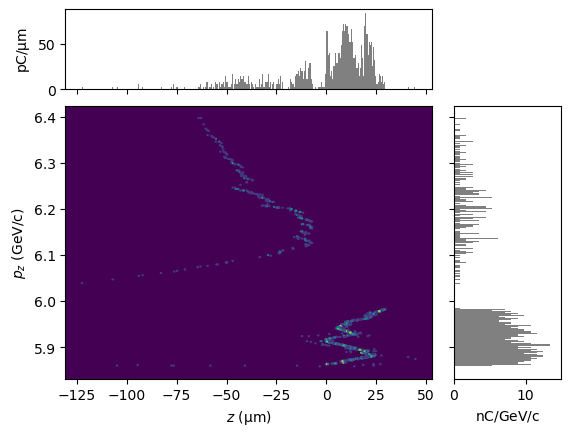

-38 -46
[-0.01500000000000003, 4.0457304864263075e-05]
1.6007072e-09


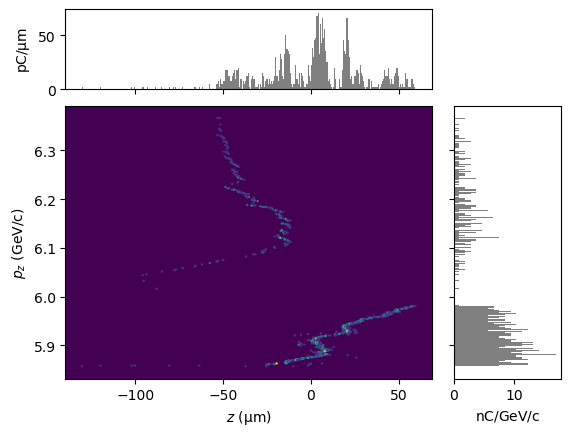

-38 -44
[-0.013200000000000042, 3.9183009959987215e-05]
1.6007072e-09


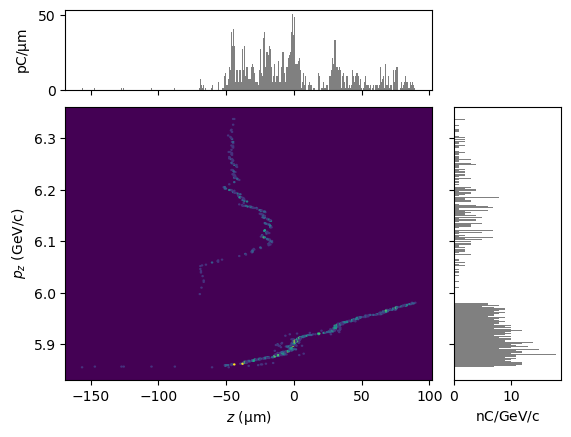

-38 -42
[-0.011200000000000054, 3.912183834792375e-05]
1.6007072e-09


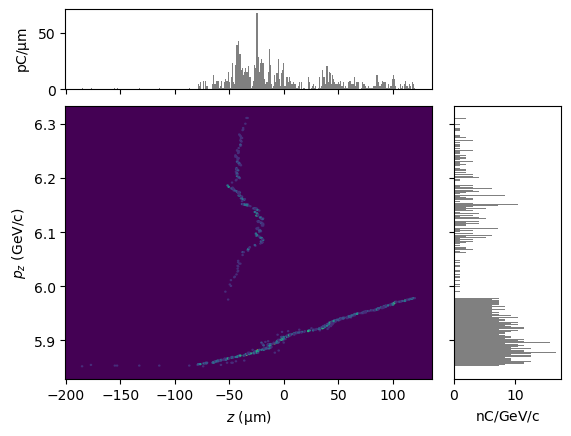

-38 -40
[-0.009200000000000066, 4.165782402363006e-05]
1.6007072e-09


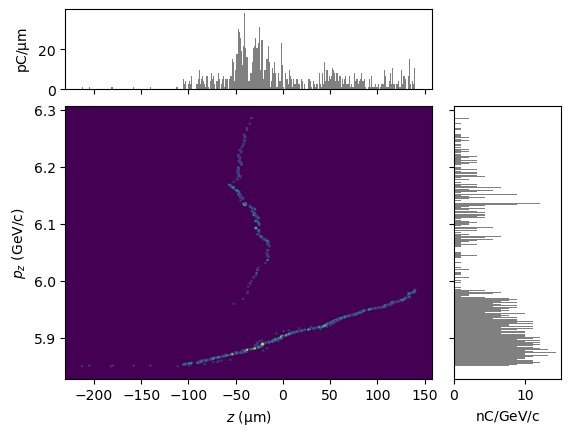

-38 -38
[-0.007200000000000078, 4.058841644754264e-05]
1.6007072e-09


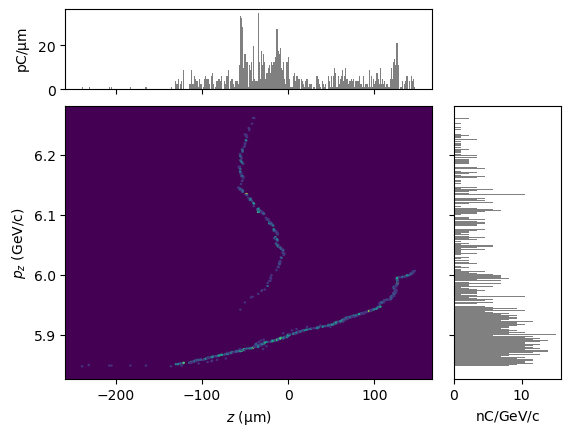

-38 -36
[-0.005100000000000091, 3.947539501584974e-05]
1.6007072e-09


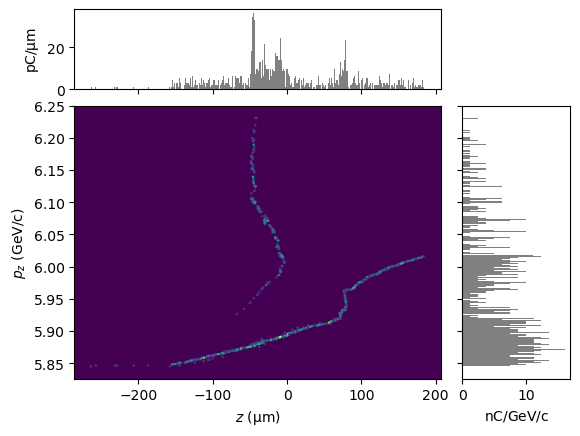

-38 -34
[-0.002400000000000107, 4.0540128418986885e-05]
1.6007072e-09


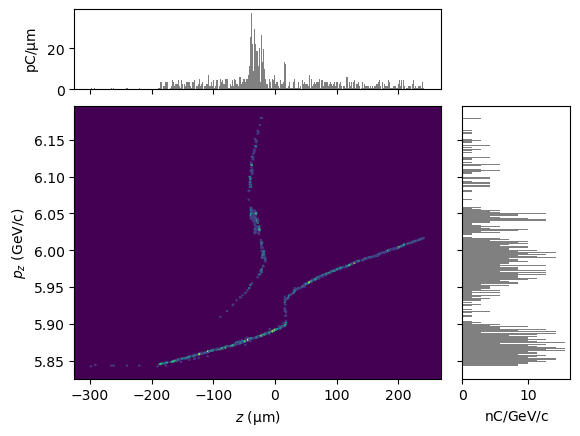

-38 -32
[0.002099999999999866, 4.033722710684799e-05]
1.6007072e-09


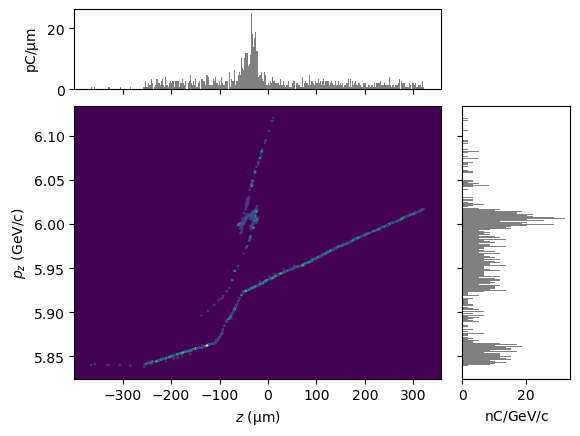

-38 -30
[0.013799999999999795, 4.025655318649378e-05]
1.6007072e-09


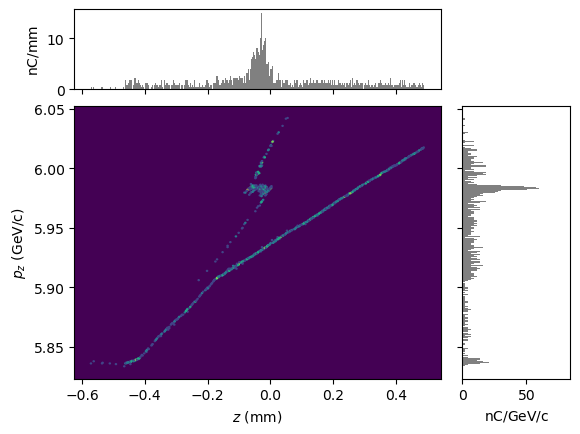

-38 -28
-38 -26
-38 -24
-38 -22
-38 -20
-38 -18
-38 -16
-38 -14
-38 -12
-38 -10
-38 -8
-38 -6
-38 -4
-38 -2
-36 -50
[-0.015800000000000026, 3.991122375719035e-05]
1.6007072e-09


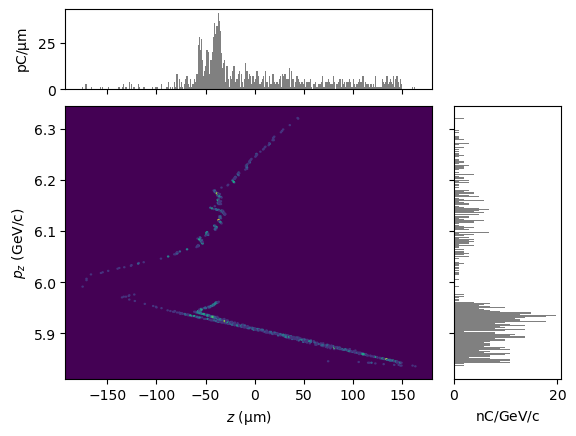

-36 -48
[-0.014100000000000036, 3.833581865504637e-05]
1.6007072e-09


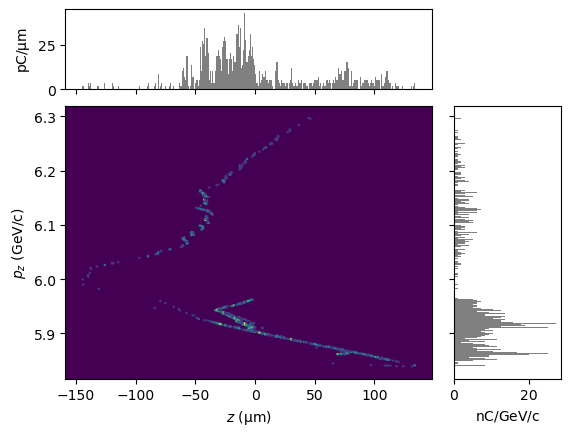

-36 -46
[-0.01190000000000005, 4.01317426402839e-05]
1.6007072e-09


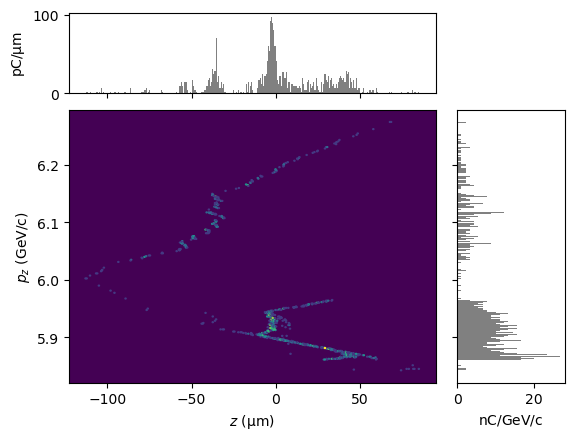

-36 -44
[-0.009600000000000063, 3.913737856154219e-05]
1.6007072e-09


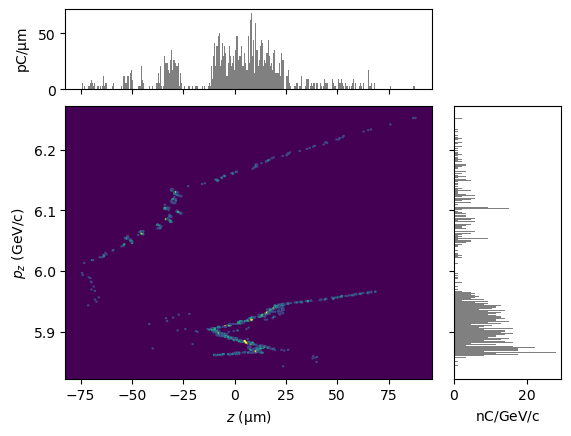

-36 -42
[-0.007900000000000074, 4.062203481497849e-05]
1.6007072e-09


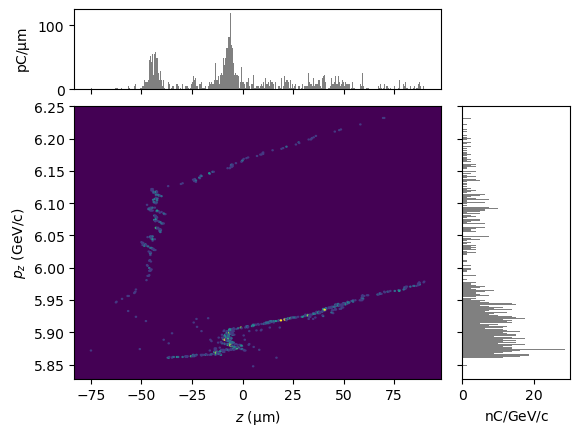

-36 -40
[-0.006400000000000083, 4.0012921501256394e-05]
1.6007072e-09


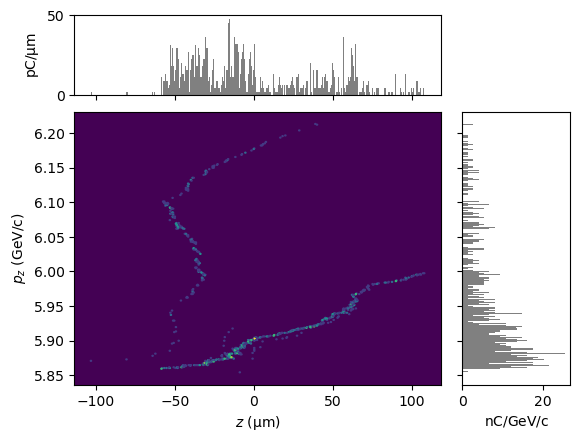

-36 -38
[-0.004300000000000095, 4.031364822460232e-05]
1.6007072e-09


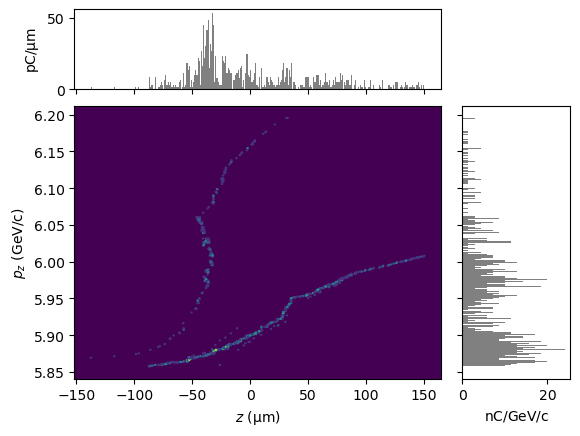

-36 -36
[-0.001400000000000113, 3.9966330820601094e-05]
1.6007072e-09


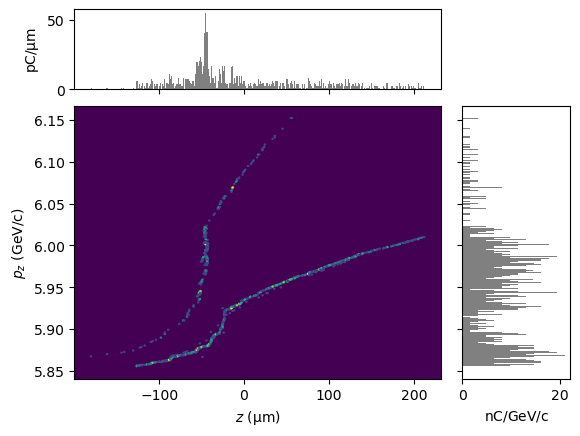

-36 -34
[0.019899999999999758, 4.588704012161344e-05]
1.6007072e-09


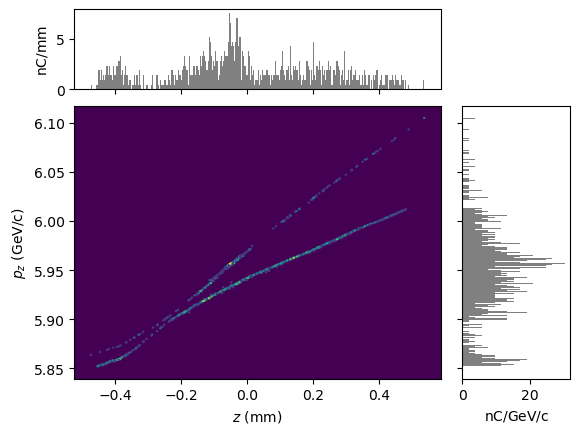

-36 -32
-36 -30
-36 -28
-36 -26
-36 -24
-36 -22
-36 -20
-36 -18
-36 -16
-36 -14
-36 -12
-36 -10
-36 -8
-36 -6
-36 -4
-36 -2
-34 -50
[-0.010900000000000055, 3.9549029196276104e-05]
1.6007072e-09


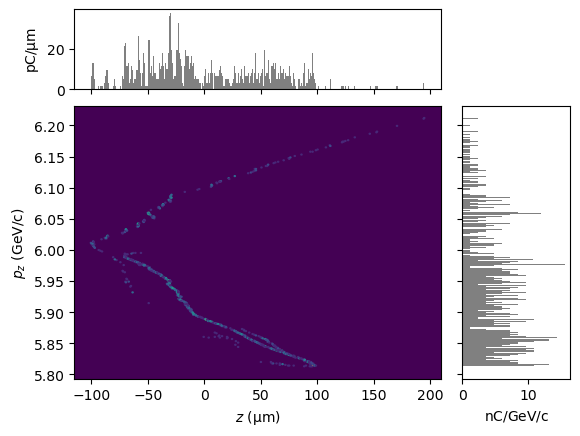

-34 -48
[-0.008200000000000072, 4.1026549619235306e-05]
1.6007072e-09


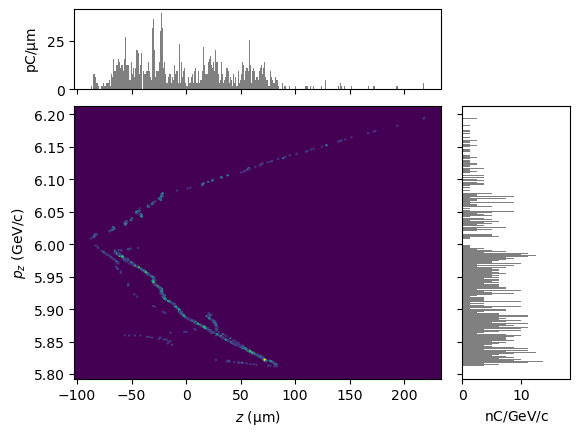

-34 -46
[-0.005300000000000089, 4.0895824001200925e-05]
1.6007072e-09


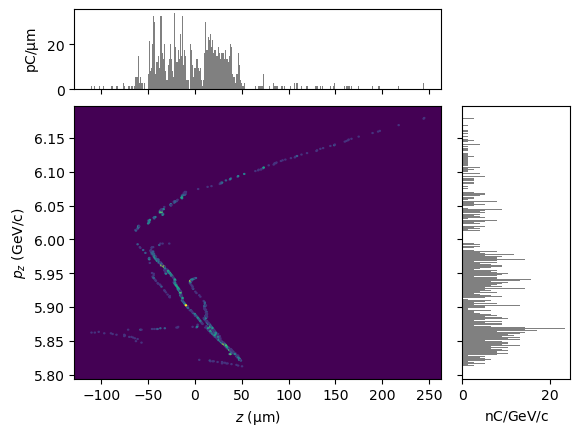

-34 -44
[-0.003900000000000098, 4.003320577047157e-05]
1.6007072e-09


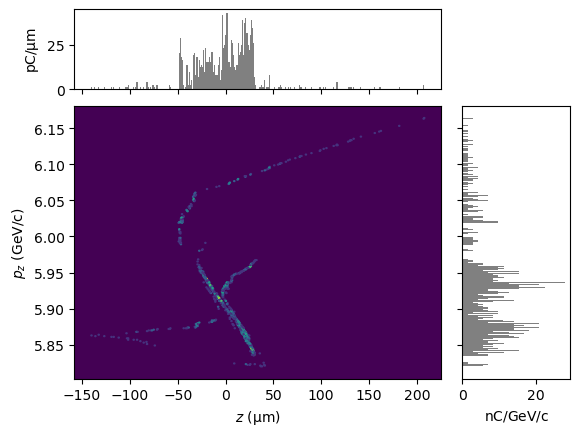

-34 -42
[-0.0038000000000000984, 4.0056511408479133e-05]
1.6007072e-09


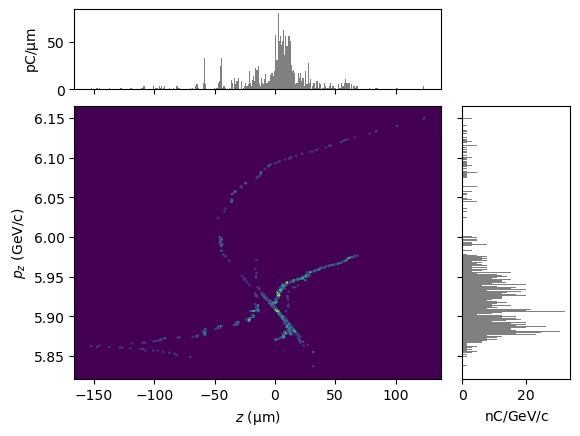

-34 -40
[-0.014900000000000031, 3.995572288887218e-05]
1.6007072e-09


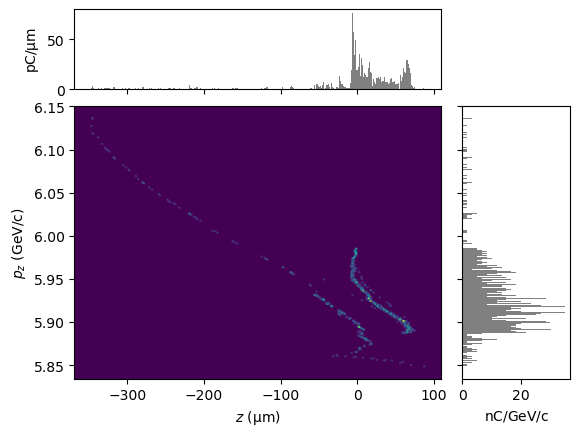

-34 -38
-34 -36
-34 -34
-34 -32
-34 -30
-34 -28
-34 -26
-34 -24
-34 -22
-34 -20
-34 -18
-34 -16
-34 -14
-34 -12
-34 -10
-34 -8
-34 -6
-34 -4
-34 -2
-32 -50
[-0.009900000000000062, 3.98764338153841e-05]
1.6007072e-09


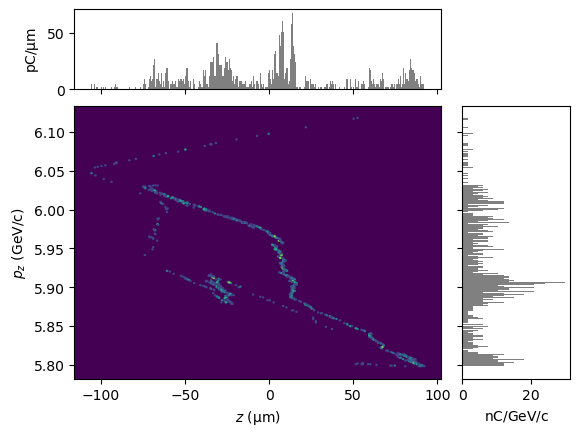

-32 -48
[-0.009200000000000066, 4.0092670148008106e-05]
1.6007072e-09


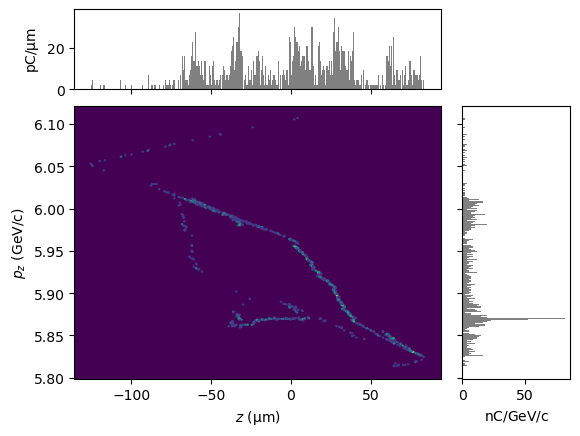

-32 -46
[-0.013200000000000042, 3.9741520881203456e-05]
1.6007072e-09


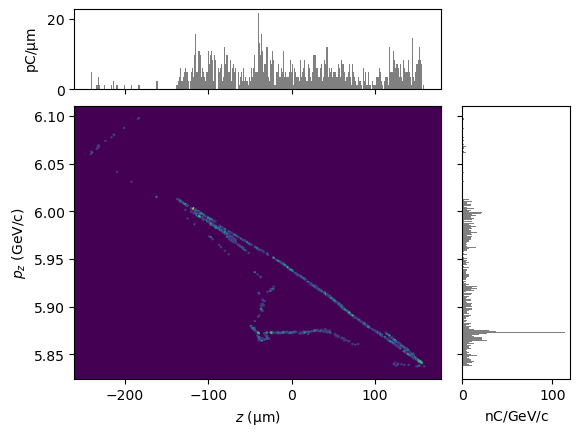

-32 -44
[-0.017300000000000017, 3.9786523704690604e-05]
1.6007072e-09


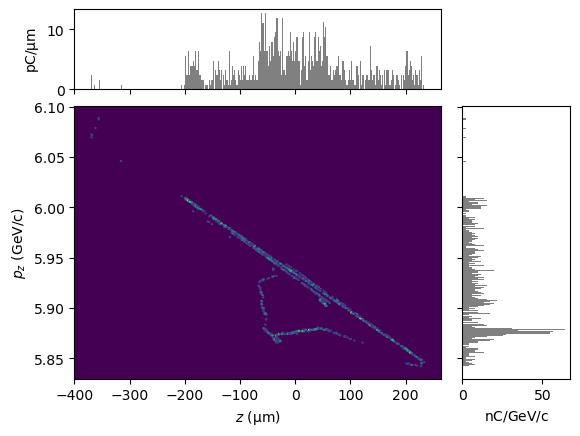

-32 -42
-32 -40
-32 -38
-32 -36
-32 -34
-32 -32
-32 -30
-32 -28
-32 -26
-32 -24
-32 -22
-32 -20
-32 -18
-32 -16
-32 -14
-32 -12
-32 -10
-32 -8
-32 -6
-32 -4
-32 -2
-30 -50
[-0.007900000000000074, 4.025357417353838e-05]
1.6007072e-09


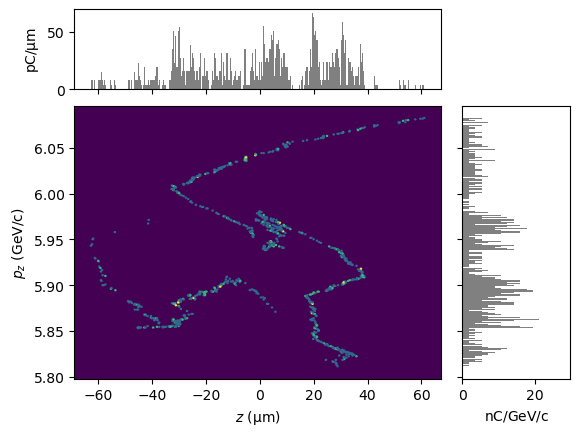

-30 -48
[-0.008000000000000073, 3.975231140205762e-05]
1.6007072e-09


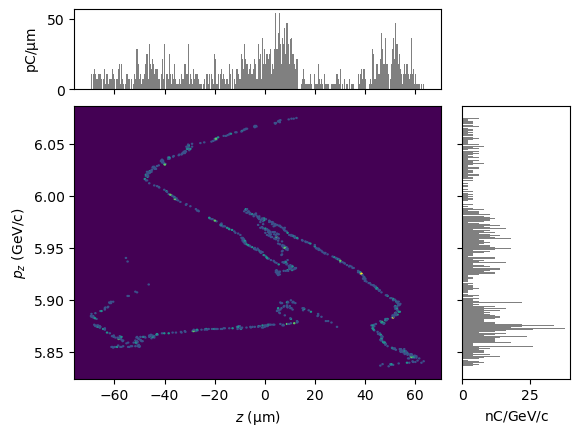

-30 -46
[-0.009100000000000066, 4.016018408809386e-05]
1.6007072e-09


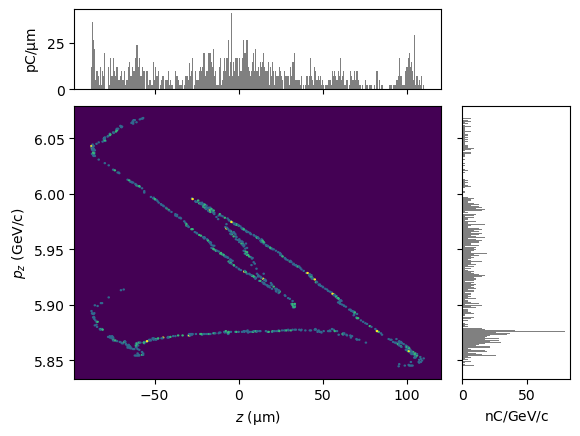

-30 -44
[-0.010500000000000058, 4.061164042850139e-05]
1.6007072e-09


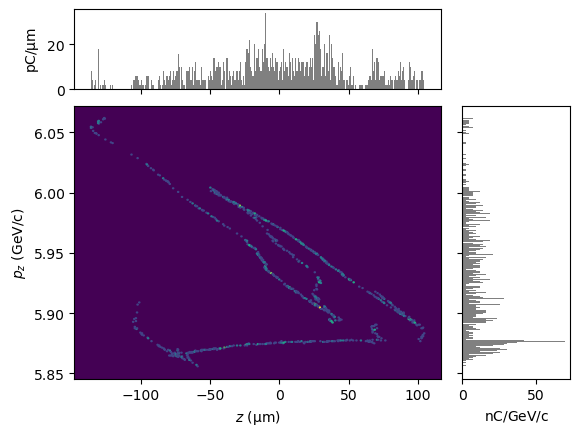

-30 -42
[-0.010800000000000056, 4.0093978669936606e-05]
1.6007072e-09


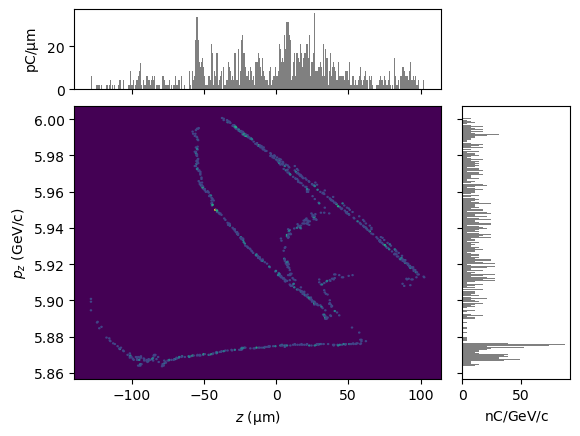

-30 -40
[-0.012100000000000048, 4.0140244648483647e-05]
1.6007072e-09


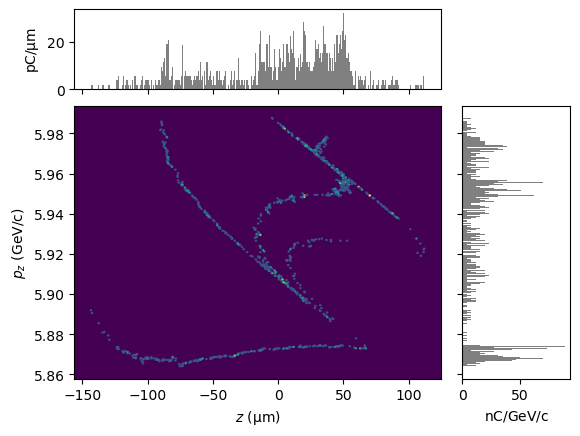

-30 -38
[-0.012300000000000047, 3.9672771329178326e-05]
1.6007072e-09


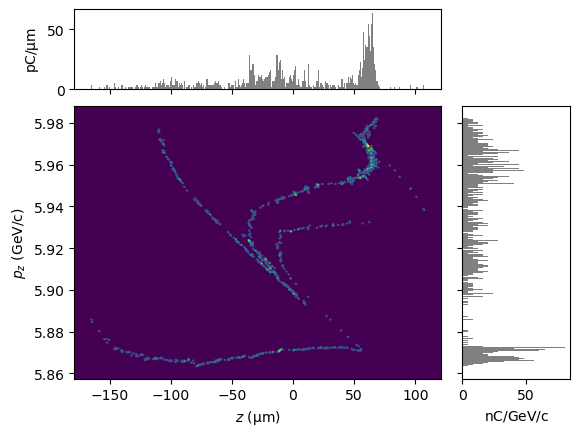

-30 -36
[-0.01340000000000004, 4.0096452358107085e-05]
1.6007072e-09


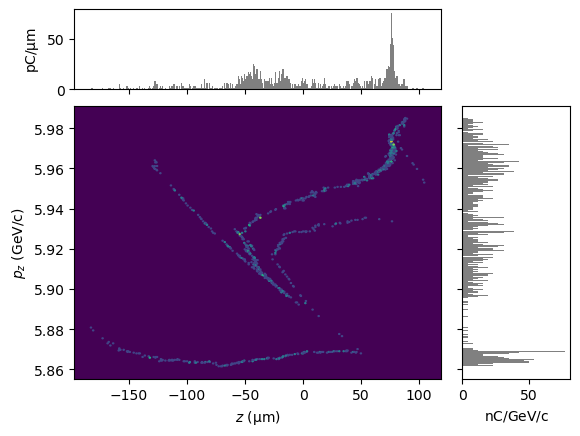

-30 -34
[-0.014500000000000034, 4.0240946470087154e-05]
1.6007072e-09


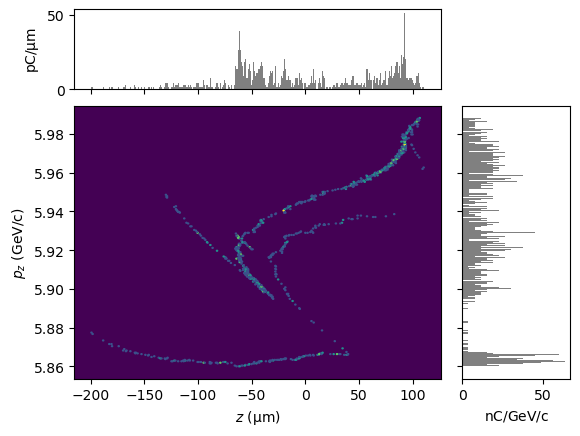

-30 -32
[-0.016000000000000025, 4.015310918250383e-05]
1.6007072e-09


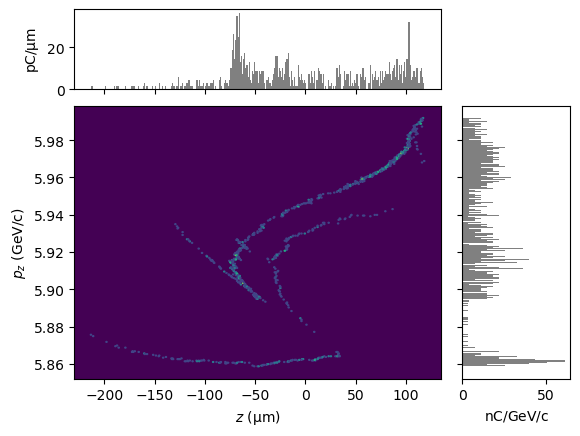

-30 -30
[-0.017100000000000018, 3.998211770387944e-05]
1.6007072e-09


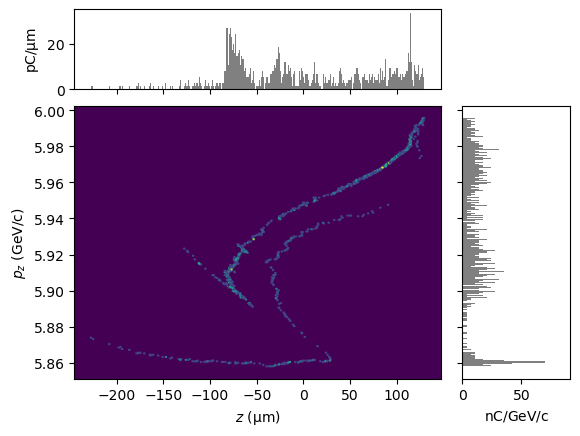

-30 -28
[-0.017900000000000013, 4.016672245354035e-05]
1.6007072e-09


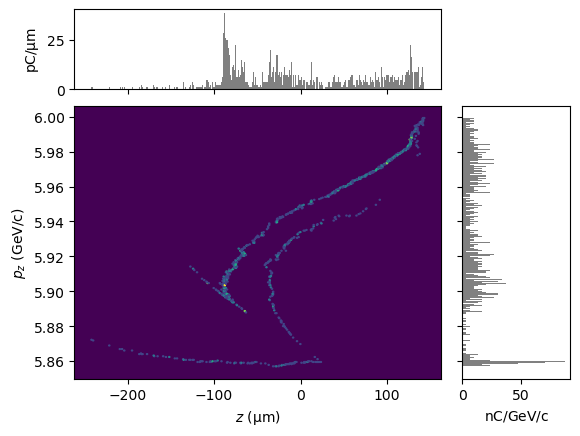

-30 -26
[-0.019100000000000006, 3.966247599371597e-05]
1.6007072e-09


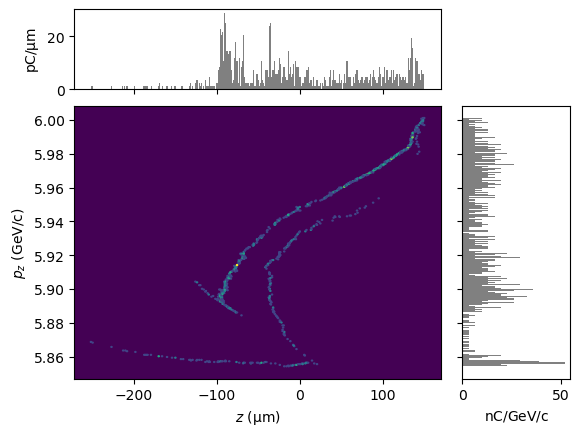

-30 -24
[-0.02, 4.157653496412531e-05]
1.6007072e-09


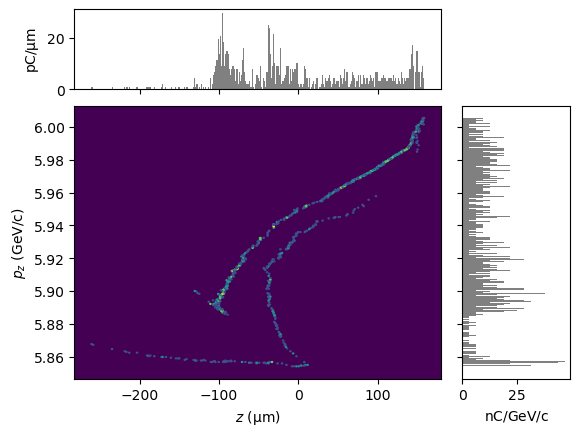

-30 -22
[-0.02, 4.999434805801409e-05]
1.6007072e-09


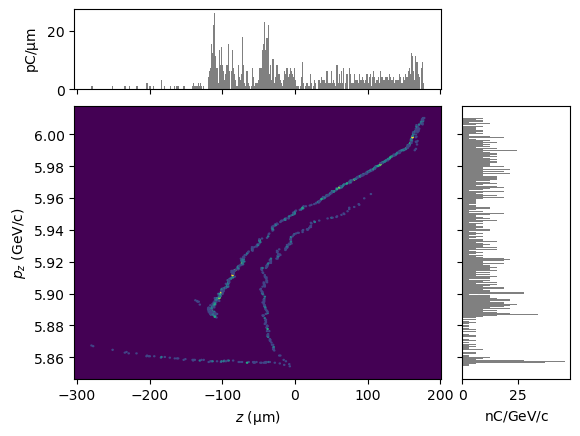

-30 -20
-30 -18
-30 -16
-30 -14
-30 -12
-30 -10
-30 -8
-30 -6
-30 -4
-30 -2
-28 -50
[-0.010900000000000055, 3.9557995886225686e-05]
1.6007072e-09


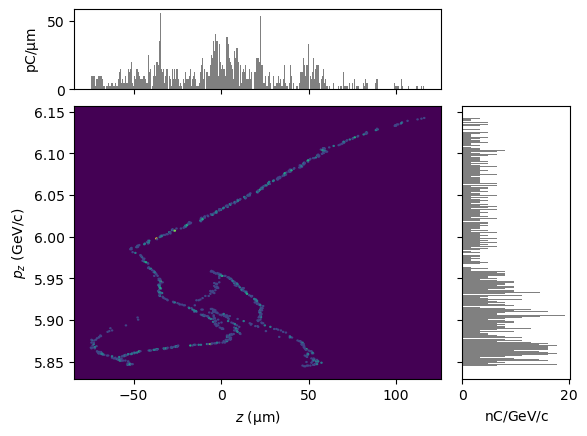

-28 -48
[-0.010400000000000059, 3.921292227556125e-05]
1.6007072e-09


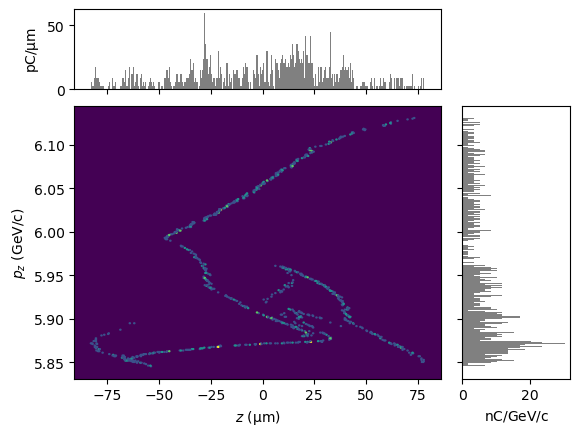

-28 -46
[-0.009200000000000066, 3.9763214284734236e-05]
1.6007072e-09


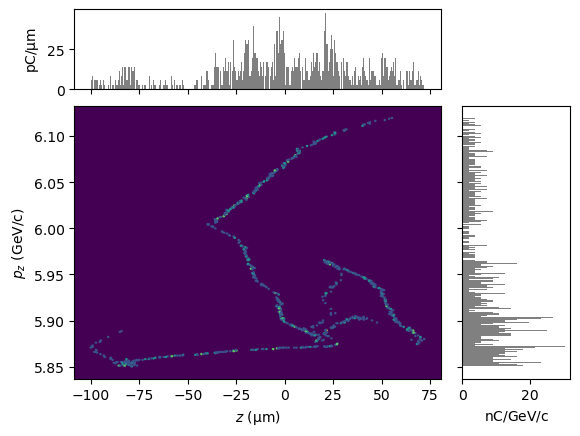

-28 -44
[-0.007700000000000075, 4.010858292713254e-05]
1.6007072e-09


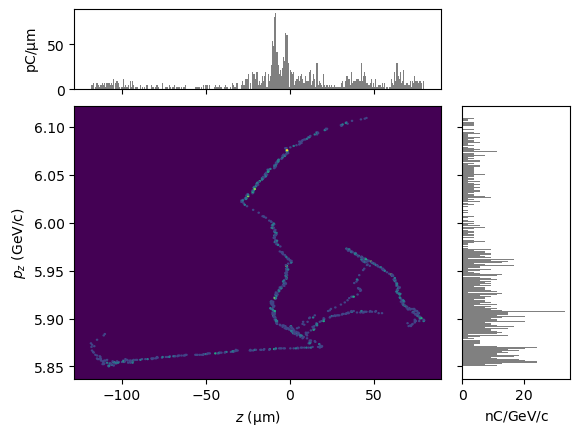

-28 -42
[-0.00680000000000008, 4.0062748177225174e-05]
1.6007072e-09


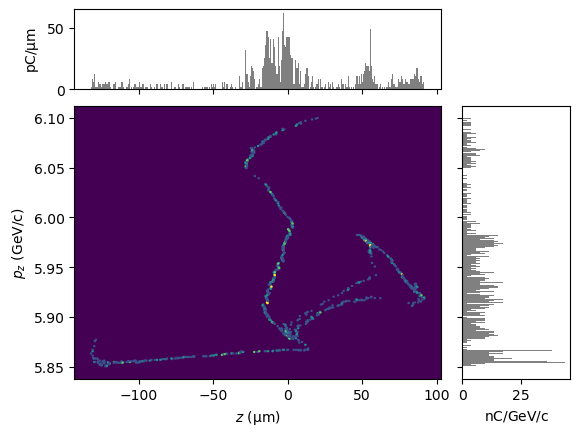

-28 -40
[-0.005400000000000089, 3.95768547358584e-05]
1.6007072e-09


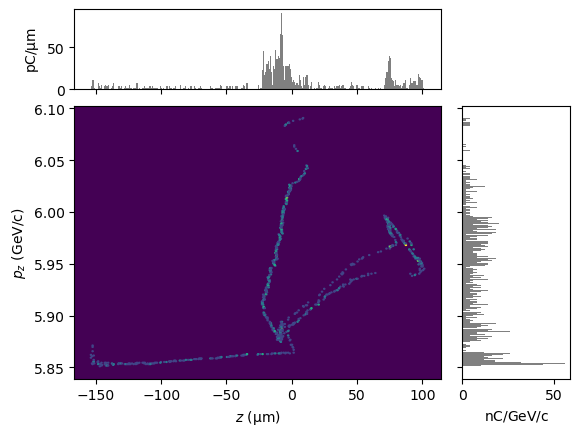

-28 -38
[-0.0036000000000000996, 3.982908127866602e-05]
1.6007072e-09


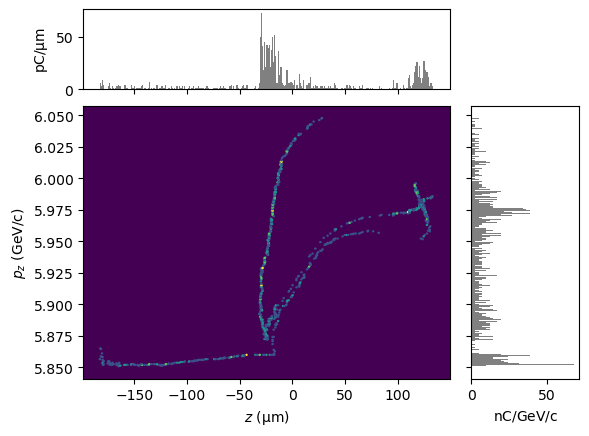

-28 -36
[-0.0018000000000001105, 4.0620892427428953e-05]
1.6007072e-09


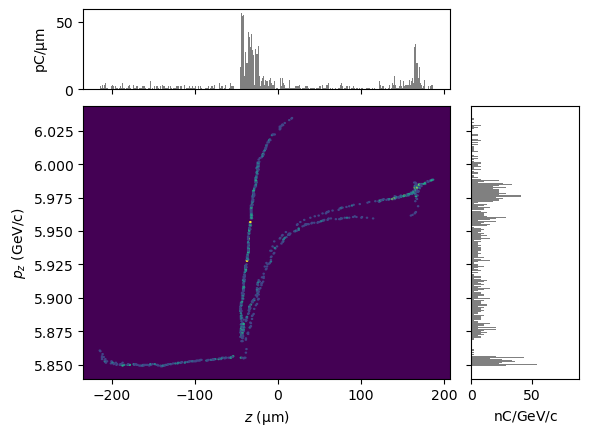

-28 -34
[0.00019999999999987736, 4.0723891006271907e-05]
1.6007072e-09


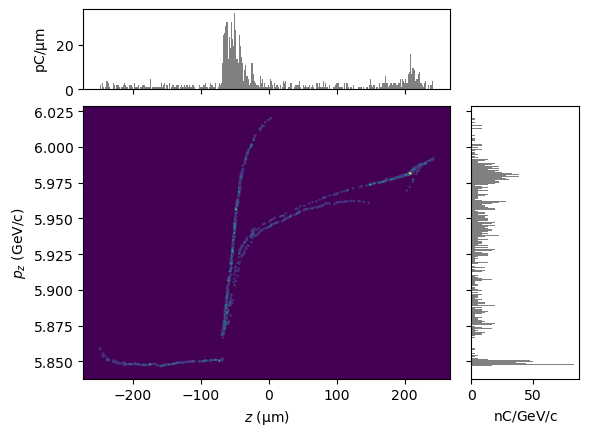

-28 -32
[0.007799999999999831, 4.004697901366776e-05]
1.6007072e-09


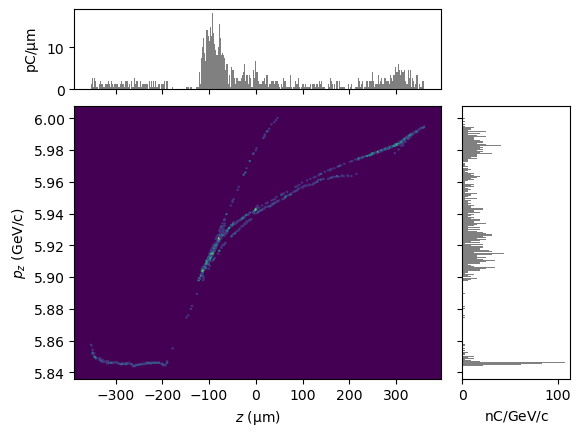

-28 -30
-28 -28
-28 -26
-28 -24
-28 -22
-28 -20
-28 -18
-28 -16
-28 -14
-28 -12
-28 -10
-28 -8
-28 -6
-28 -4
-28 -2
-26 -50
[-0.013800000000000038, 3.9562381923790647e-05]
1.6007072e-09


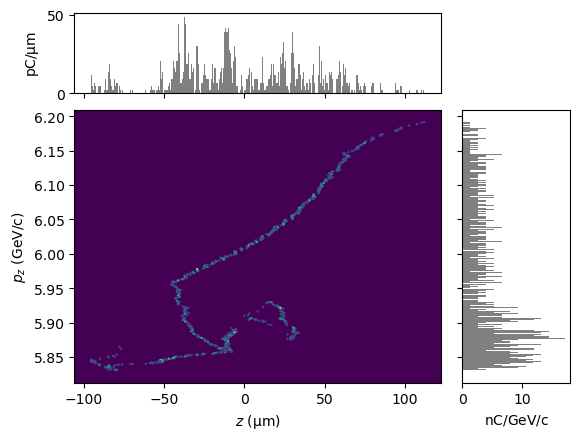

-26 -48
[-0.012100000000000048, 4.090210574156746e-05]
1.6007072e-09


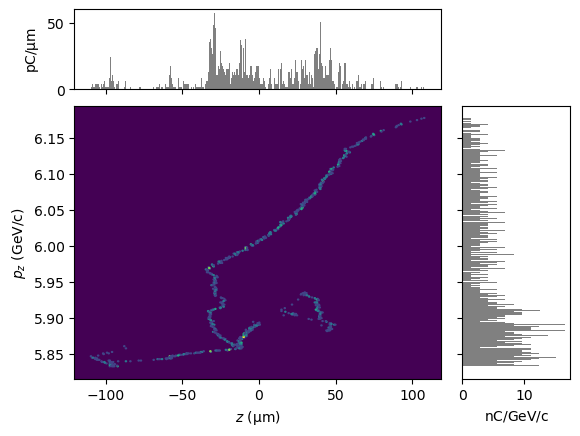

-26 -46
[-0.010300000000000059, 4.1231323163981386e-05]
1.6007072e-09


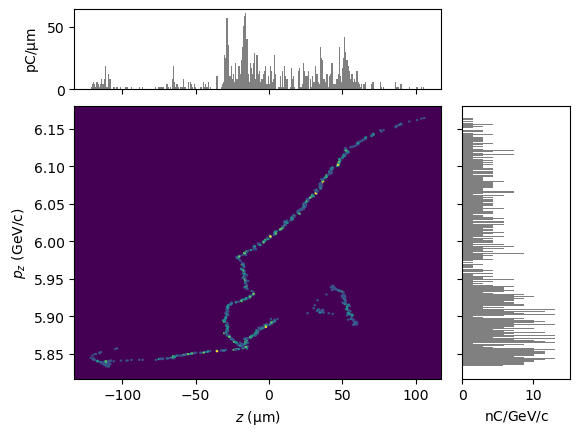

-26 -44
[-0.00850000000000007, 3.945343379169972e-05]
1.6007072e-09


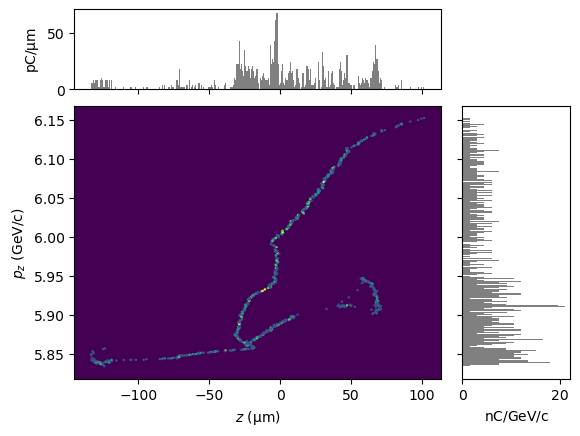

-26 -42
[-0.00680000000000008, 4.0091836376481384e-05]
1.6007072e-09


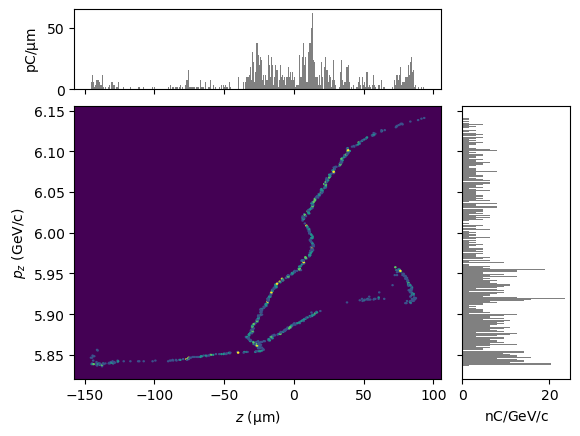

-26 -40
[-0.005300000000000089, 3.990486790102544e-05]
1.6007072e-09


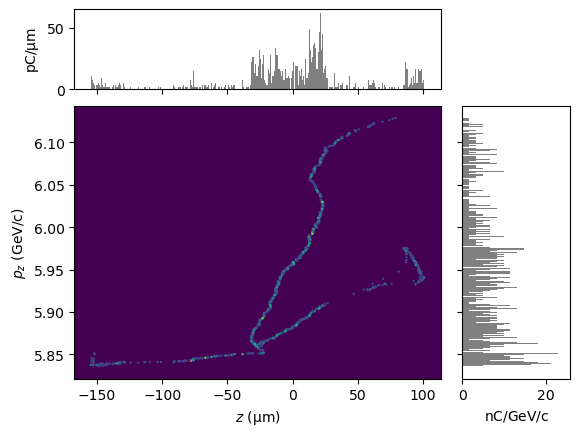

-26 -38
[-0.003400000000000101, 3.998312494420138e-05]
1.6007072e-09


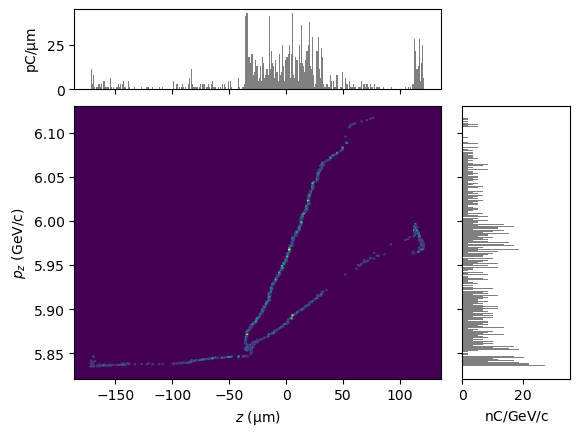

-26 -36
[-0.001400000000000113, 4.036428862025732e-05]
1.6007072e-09


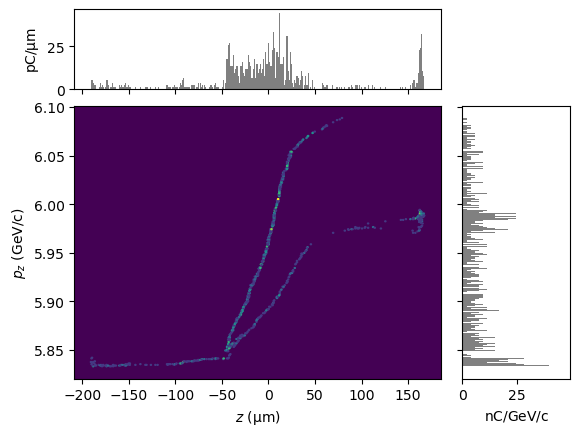

-26 -34
[0.001099999999999872, 3.9443376005173396e-05]
1.6007072e-09


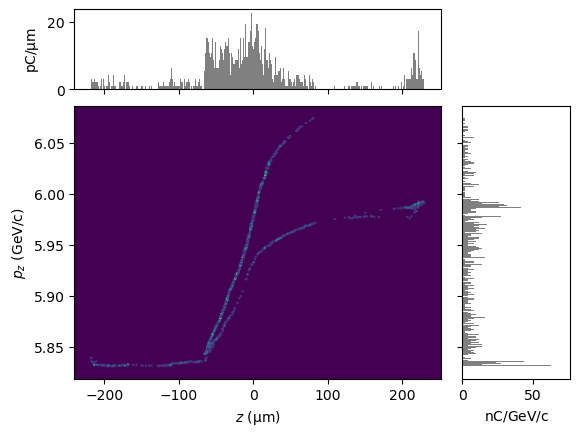

-26 -32
-26 -30
-26 -28
-26 -26
-26 -24
-26 -22
-26 -20
-26 -18
-26 -16
-26 -14
-26 -12
-26 -10
-26 -8
-26 -6
-26 -4
-26 -2
-24 -50
[-0.01700000000000002, 4.009607916256397e-05]
1.6007072e-09


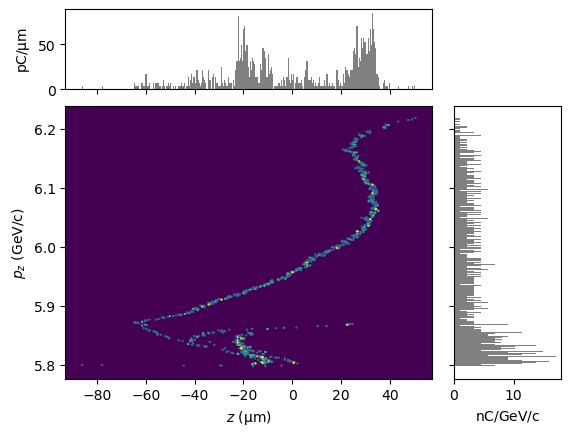

-24 -48
[-0.01500000000000003, 3.972371188538869e-05]
1.6007072e-09


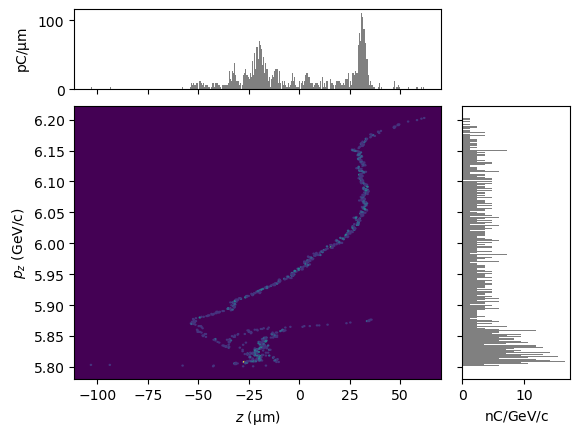

-24 -46
[-0.013100000000000042, 3.8864010065268876e-05]
1.6007072e-09


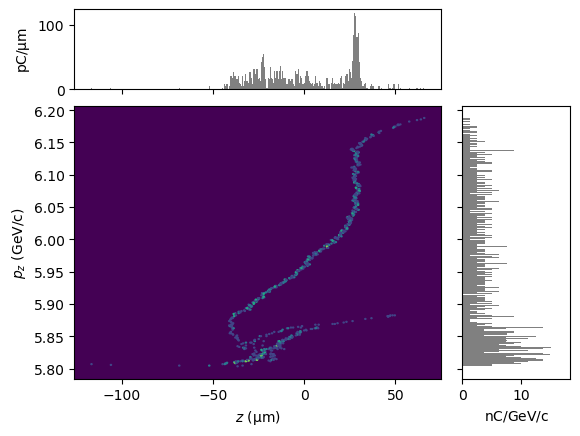

-24 -44
[-0.011000000000000055, 4.130364277543296e-05]
1.6007072e-09


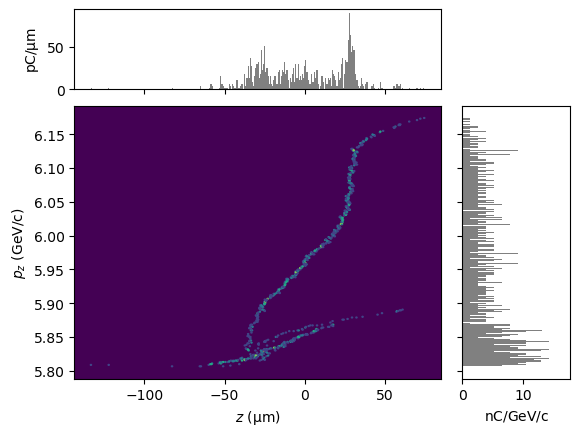

-24 -42
[-0.009000000000000067, 3.935598097398881e-05]
1.6007072e-09


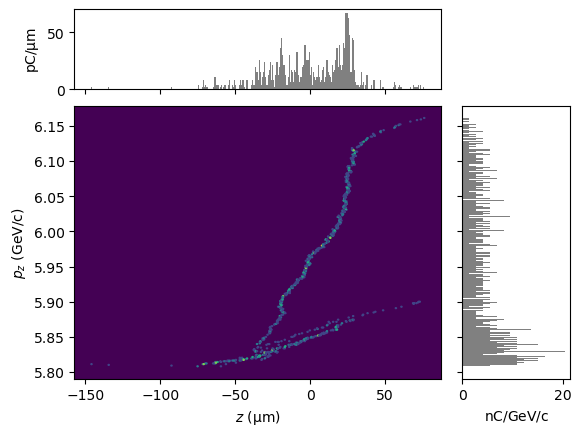

-24 -40
[-0.00680000000000008, 4.087981285938524e-05]
1.6007072e-09


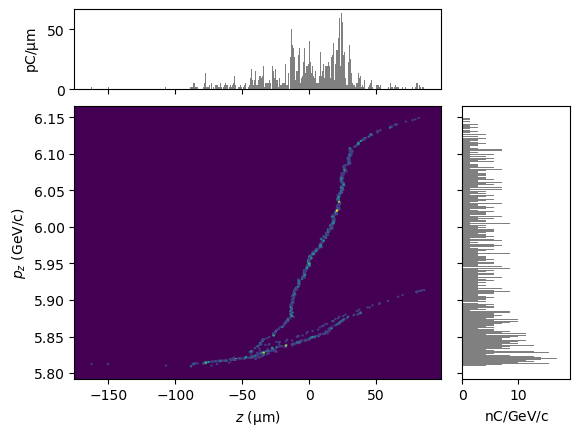

-24 -38
[-0.004700000000000093, 3.9824598543549254e-05]
1.6007072e-09


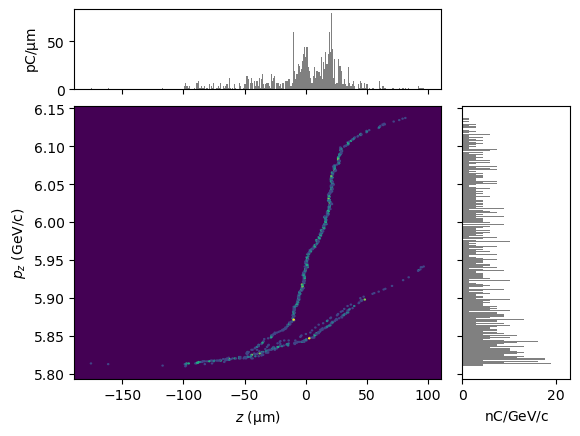

-24 -36
[-0.0025000000000001063, 4.068214794291021e-05]
1.6007072e-09


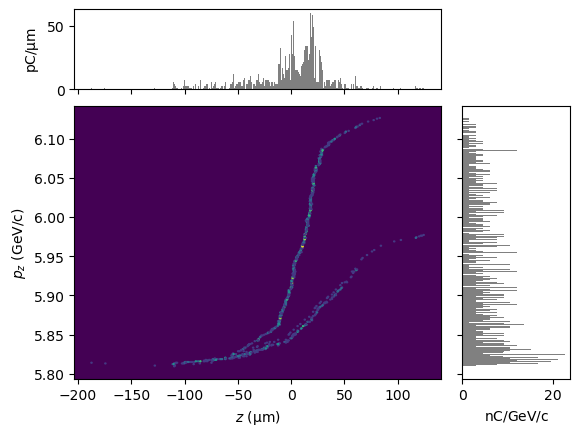

-24 -34
[-0.00020000000000012022, 4.032426369403309e-05]
1.6007072e-09


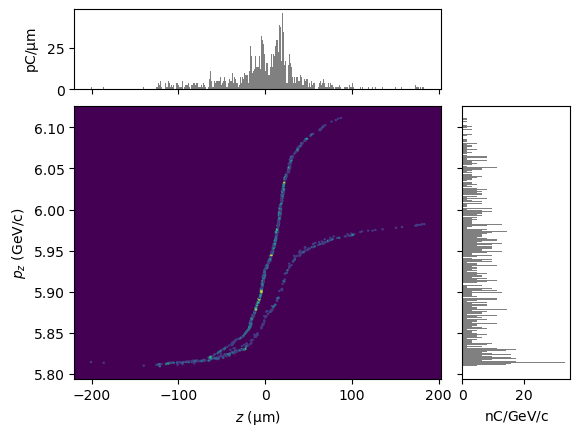

-24 -32
-24 -30
-24 -28
-24 -26
-24 -24
-24 -22
-24 -20
-24 -18
-24 -16
-24 -14
-24 -12
-24 -10
-24 -8
-24 -6
-24 -4
-24 -2
-22 -50
[-0.02, 4.705310395816166e-05]
1.6007072e-09


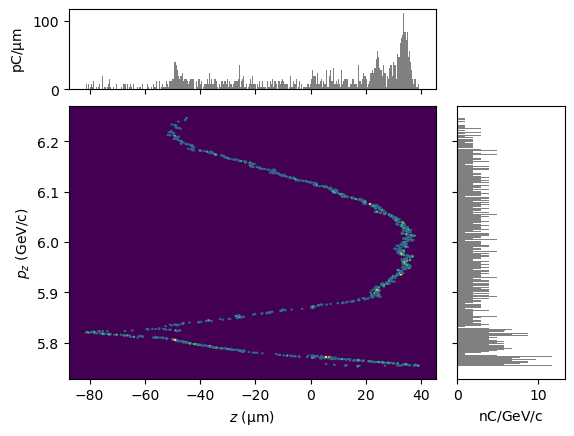

-22 -48
[-0.017800000000000014, 3.993911022342084e-05]
1.6007072e-09


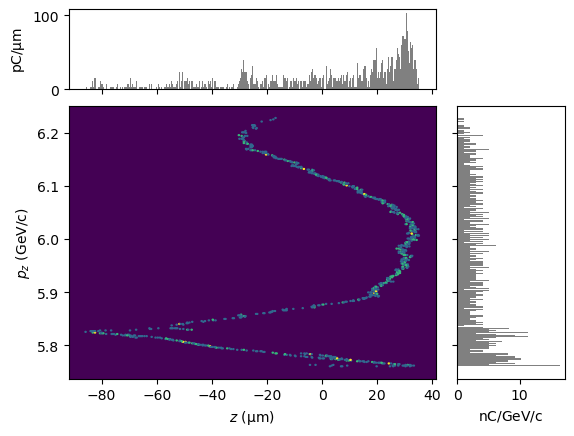

-22 -46
[-0.015500000000000028, 3.852731671936813e-05]
1.6007072e-09


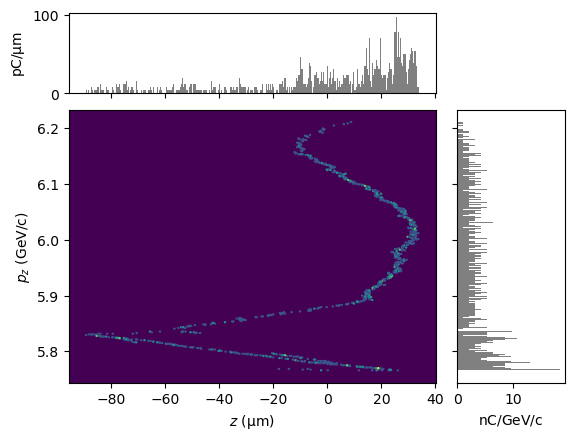

-22 -44
[-0.01340000000000004, 4.097097002940894e-05]
1.6007072e-09


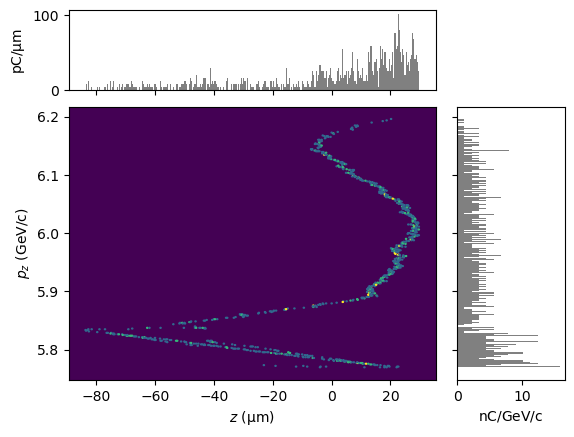

-22 -42
[-0.011300000000000053, 4.101134218455213e-05]
1.6007072e-09


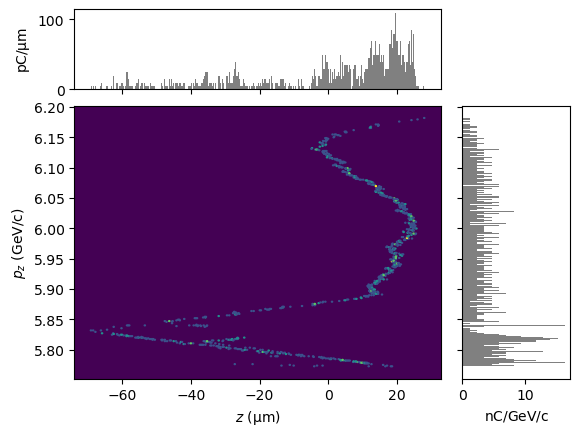

-22 -40
[-0.009000000000000067, 3.930687619693525e-05]
1.6007072e-09


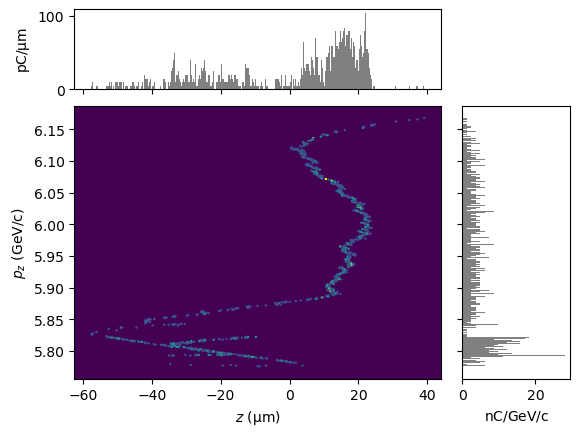

-22 -38
[-0.00680000000000008, 3.911330028093258e-05]
1.6007072e-09


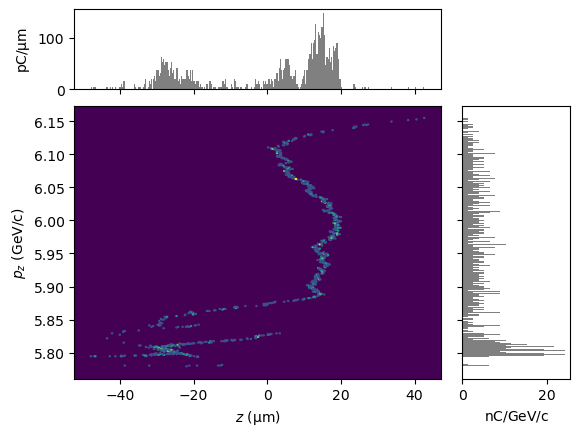

-22 -36
[-0.004400000000000095, 4.061903146974162e-05]
1.6007072e-09


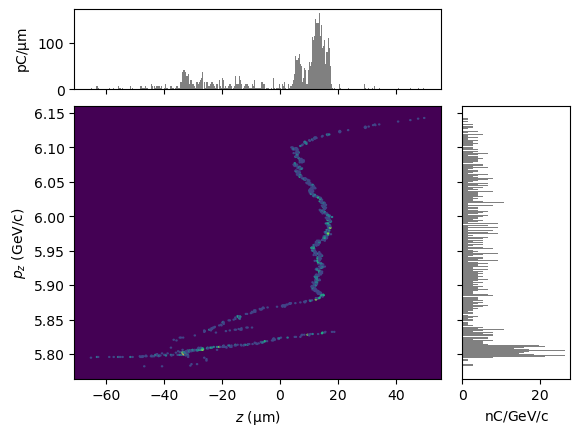

-22 -34
[-0.0020000000000001093, 3.919586022325607e-05]
1.6007072e-09


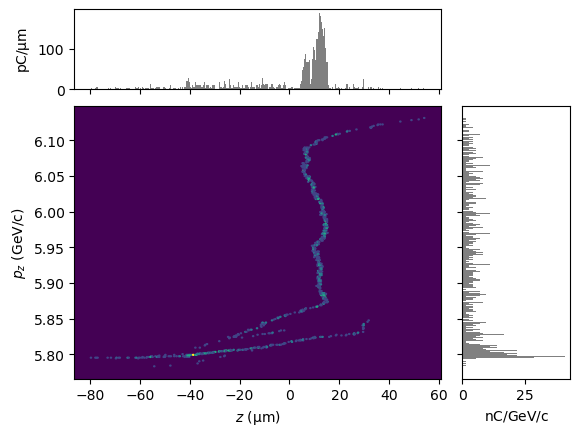

-22 -32
[0.0004999999999998755, 3.915680315775773e-05]
1.6007072e-09


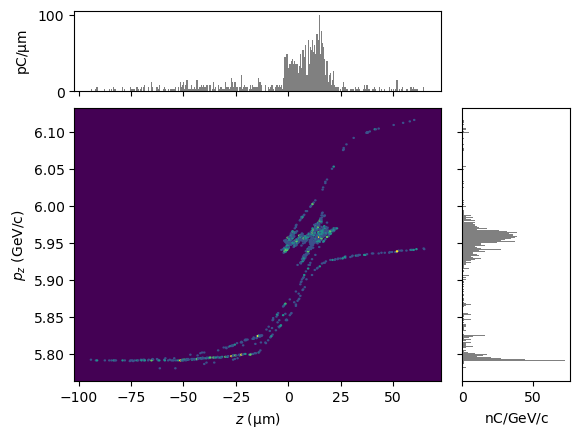

-22 -30
-22 -28
-22 -26
-22 -24
-22 -22
-22 -20
-22 -18
-22 -16
-22 -14
-22 -12
-22 -10
-22 -8
-22 -6
-22 -4
-22 -2
-20 -50
-20 -48
-20 -46
[-0.019100000000000006, 3.8160224415150986e-05]
1.6007072e-09


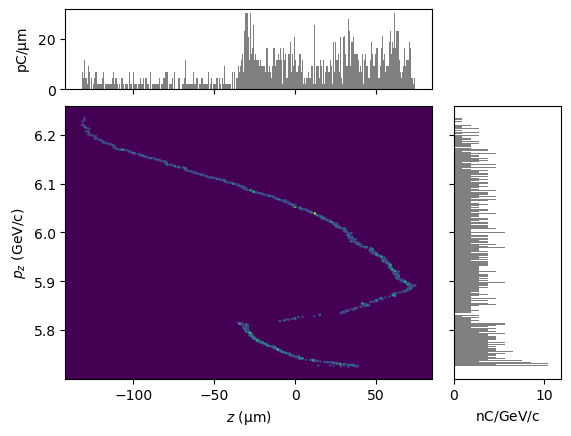

-20 -44
[-0.01680000000000002, 4.0220061404846856e-05]
1.6007072e-09


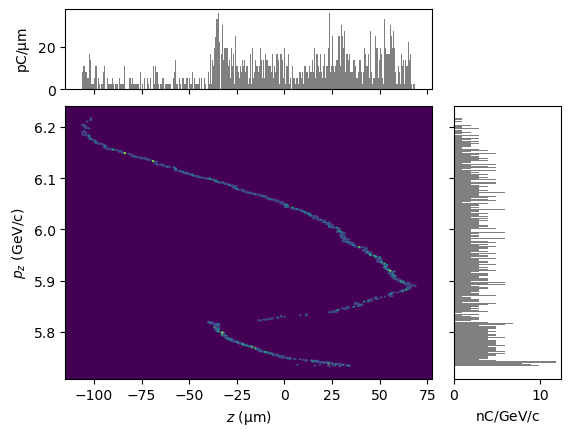

-20 -42
[-0.014500000000000034, 3.959343755191347e-05]
1.6007072e-09


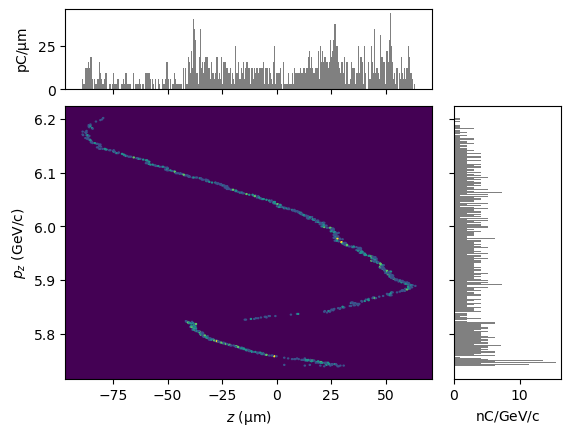

-20 -40
[-0.012100000000000048, 3.8819711341641754e-05]
1.6007072e-09


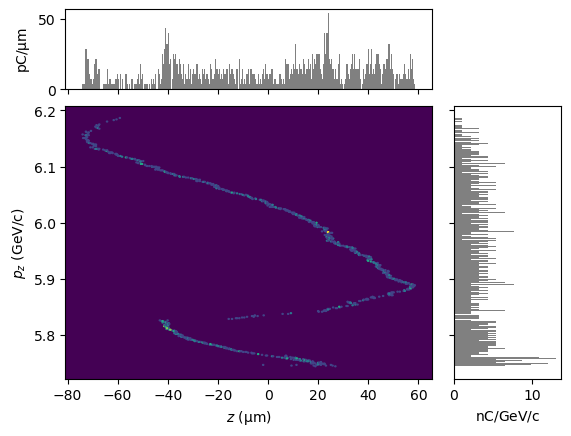

-20 -38
[-0.009400000000000065, 4.1200652157460927e-05]
1.6007072e-09


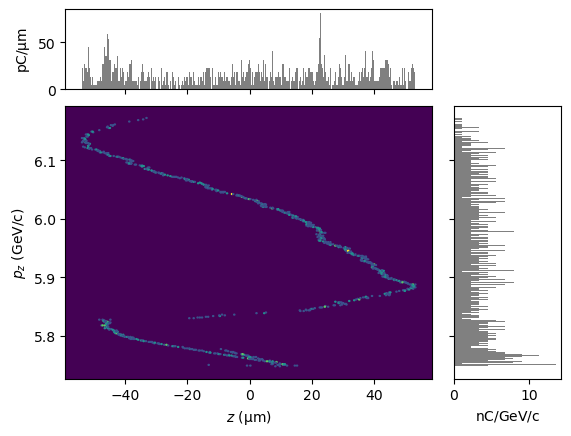

-20 -36
[-0.006700000000000081, 3.922822741525039e-05]
1.6007072e-09


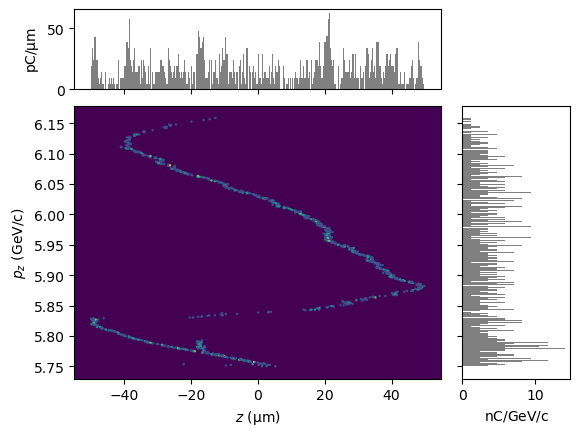

-20 -34
[-0.004000000000000097, 4.161276003763355e-05]
1.6007072e-09


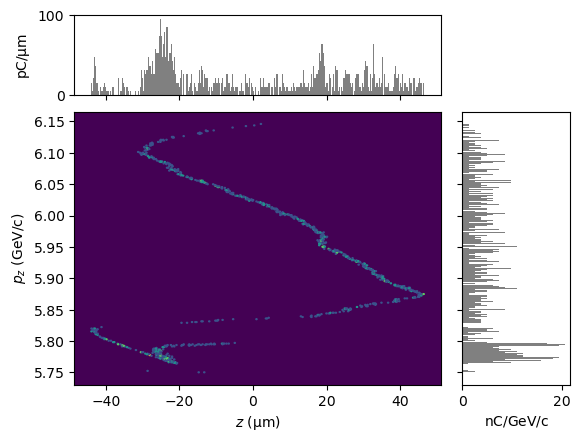

-20 -32
[-0.001400000000000113, 3.8656987800138185e-05]
1.6007072e-09


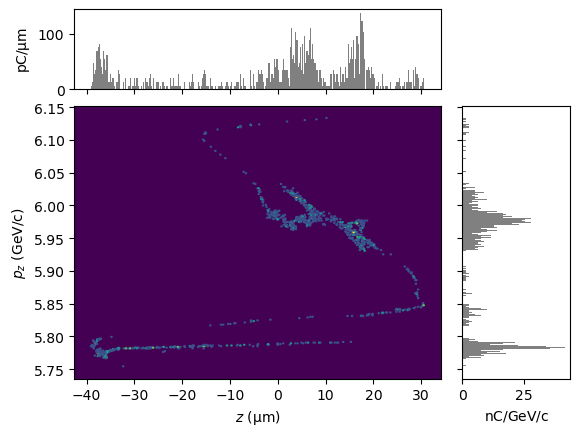

-20 -30
[0.001899999999999867, 3.937621137572953e-05]
1.6007072e-09


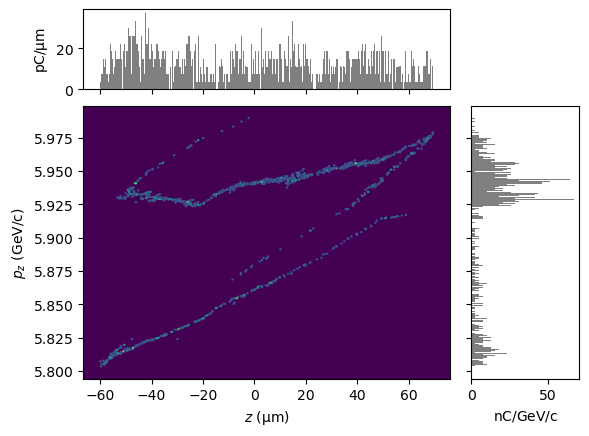

-20 -28
[0.01819999999999977, 3.9778475236137644e-05]
1.6007072e-09


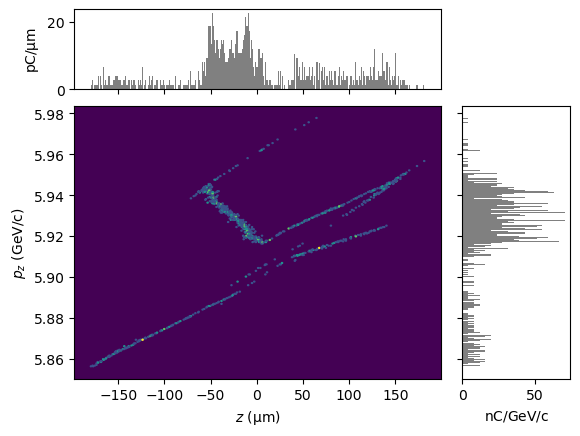

-20 -26
-20 -24
-20 -22
-20 -20
-20 -18
-20 -16
-20 -14
-20 -12
-20 -10
-20 -8
-20 -6
-20 -4
-20 -2
-18 -50
-18 -48
-18 -46
-18 -44
[-0.019000000000000006, 3.998167373429811e-05]
1.6007072e-09


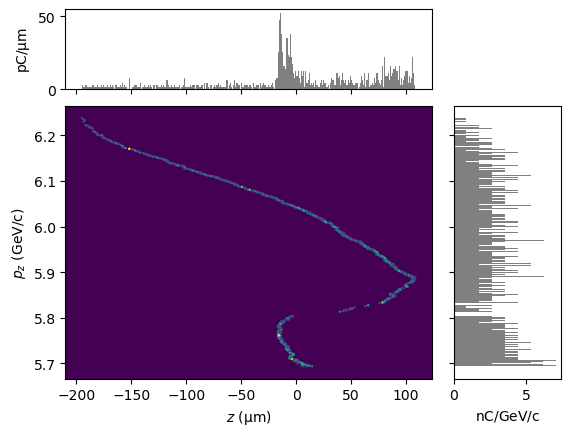

-18 -42
[-0.01670000000000002, 3.908870942468244e-05]
1.6007072e-09


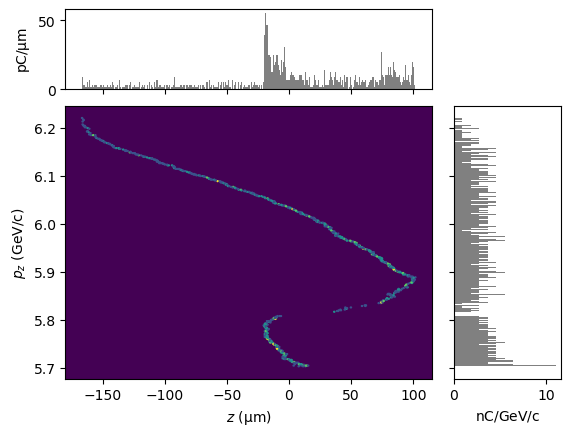

-18 -40
[-0.014200000000000036, 4.17244242321595e-05]
1.6007072e-09


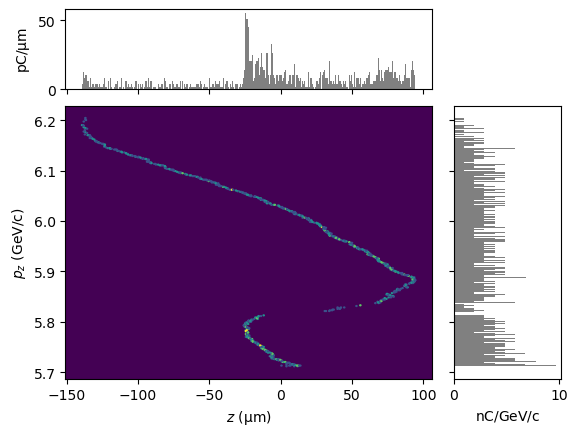

-18 -38
[-0.01170000000000005, 3.9725277991977016e-05]
1.6007072e-09


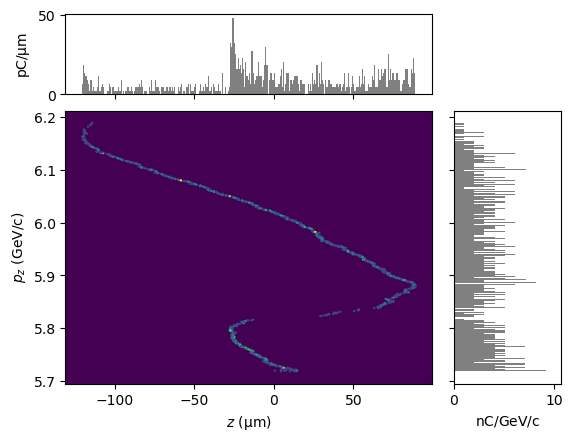

-18 -36
[-0.009000000000000067, 3.998820079664175e-05]
1.6007072e-09


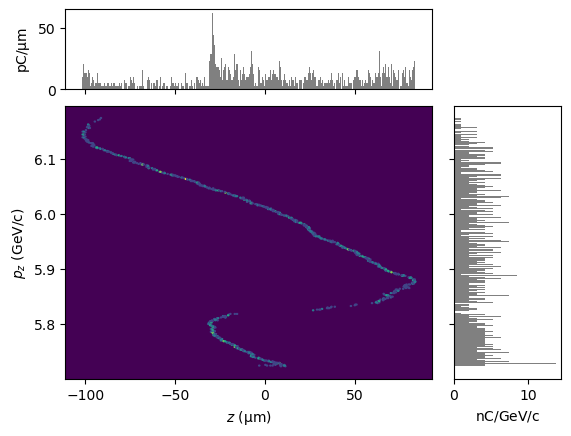

-18 -34
[-0.006200000000000084, 3.970405432475147e-05]
1.6007072e-09


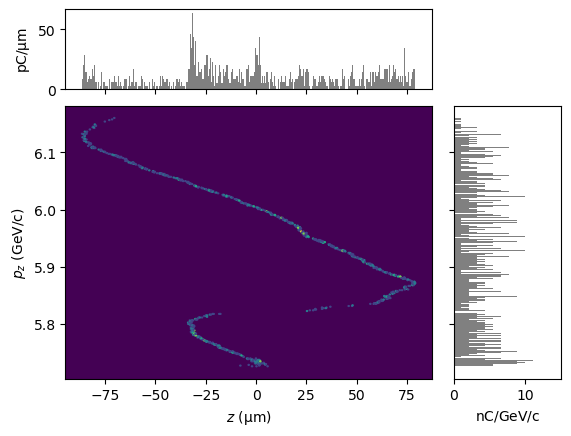

-18 -32
[-0.002700000000000105, 3.921272847379319e-05]
1.6007072e-09


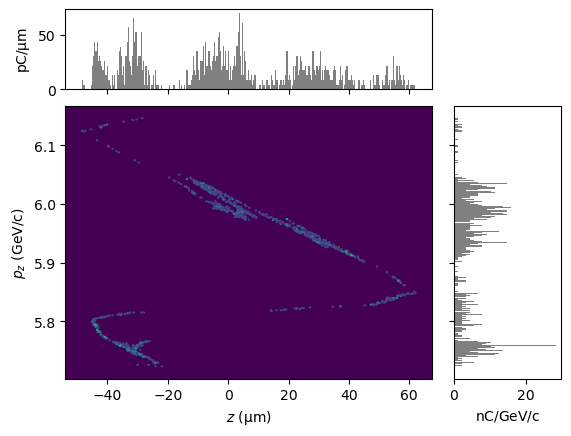

-18 -30
[-0.0003000000000001196, 3.9672522473353246e-05]
1.6007072e-09


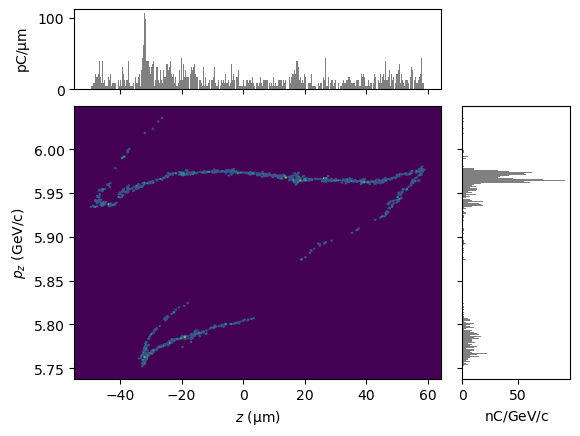

-18 -28
[0.006699999999999838, 3.956219446299281e-05]
1.6007072e-09


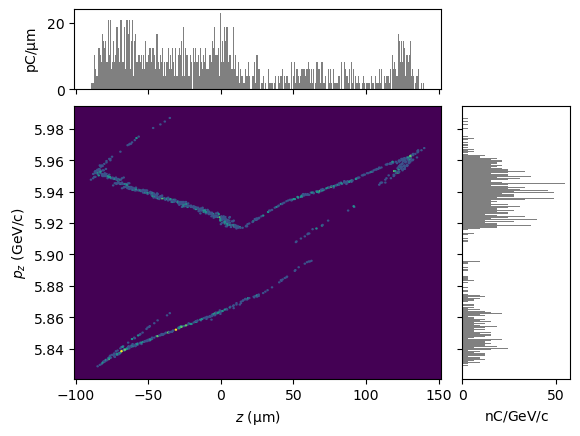

-18 -26
-18 -24
-18 -22
-18 -20
-18 -18
-18 -16
-18 -14
-18 -12
-18 -10
-18 -8
-18 -6
-18 -4
-18 -2
-16 -50
-16 -48
-16 -46
-16 -44
-16 -42
[-0.01830000000000001, 4.175944034688877e-05]
1.6007072e-09


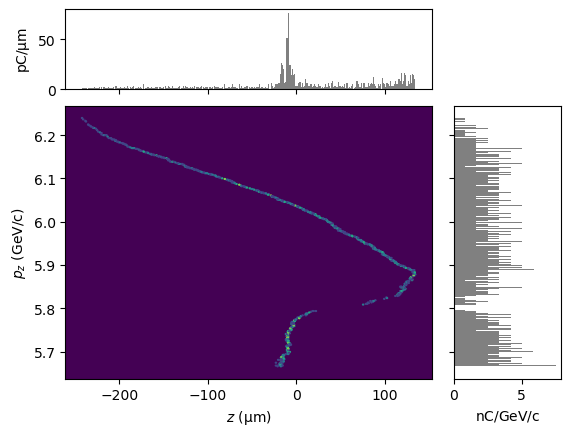

-16 -40
[-0.015900000000000025, 3.952746683950952e-05]
1.6007072e-09


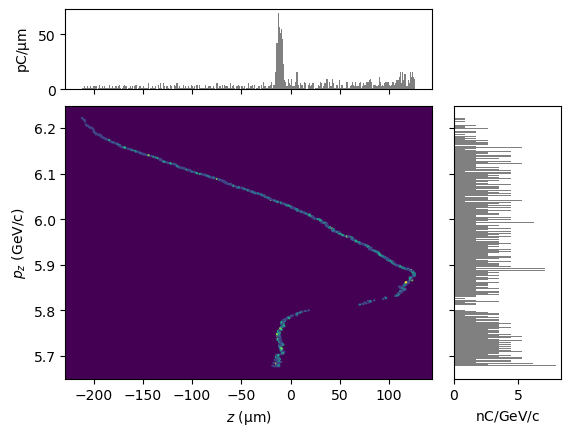

-16 -38
[-0.013300000000000041, 4.0155918614294005e-05]
1.6007072e-09


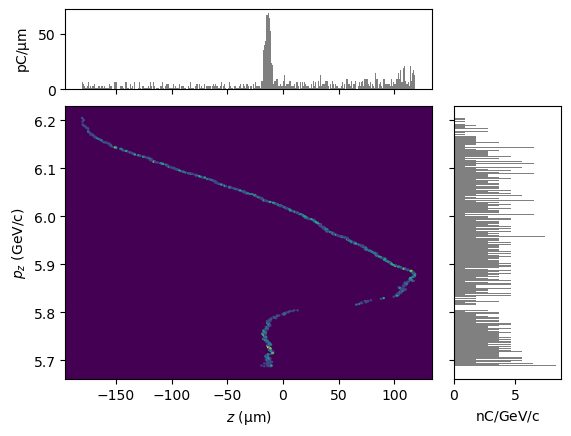

-16 -36
[-0.010500000000000058, 4.176545053714446e-05]
1.6007072e-09


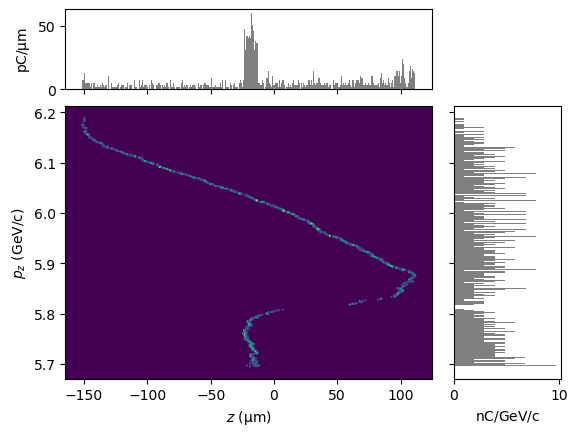

-16 -34
[-0.007700000000000075, 3.887171022312628e-05]
1.6007072e-09


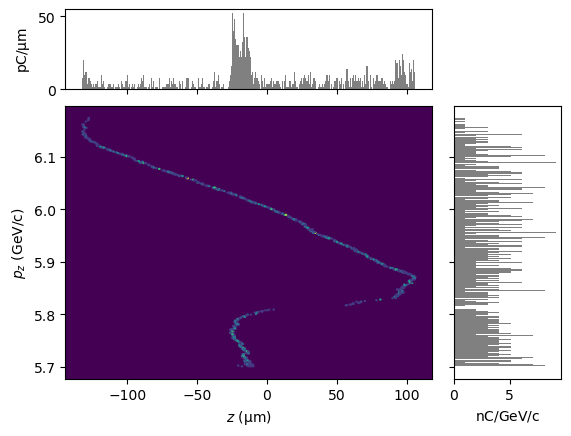

-16 -32
[-0.004000000000000097, 4.024392410159395e-05]
1.6007072e-09


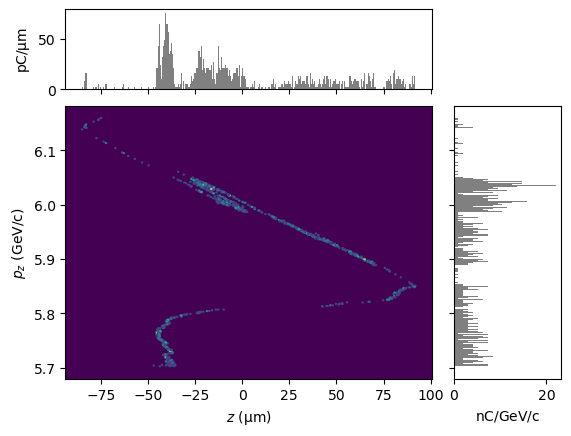

-16 -30
[-0.0015000000000001124, 3.859367333747032e-05]
1.6007072e-09


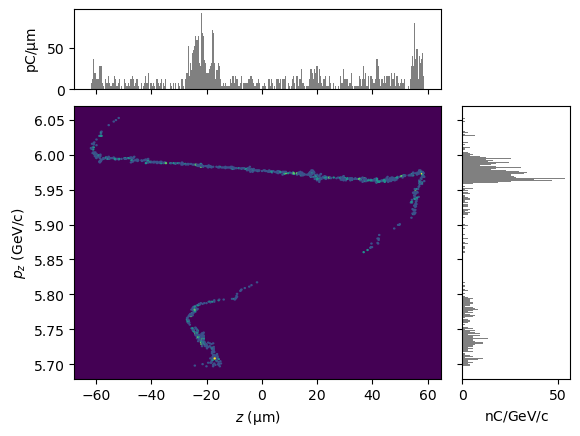

-16 -28
[0.003199999999999859, 4.076016239655934e-05]
1.6007072e-09


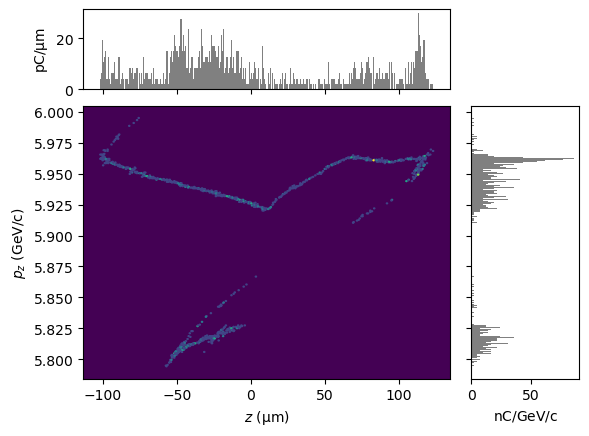

-16 -26
[0.012699999999999802, 3.9450374162053266e-05]
1.6007072e-09


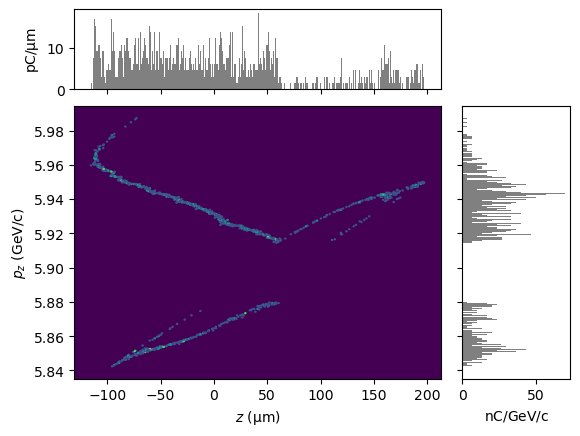

-16 -24
-16 -22
-16 -20
-16 -18
-16 -16
-16 -14
-16 -12
-16 -10
-16 -8
-16 -6
-16 -4
-16 -2
-14 -50
-14 -48
-14 -46
-14 -44
-14 -42
[-0.019600000000000003, 4.2469525464796894e-05]
1.6007072e-09


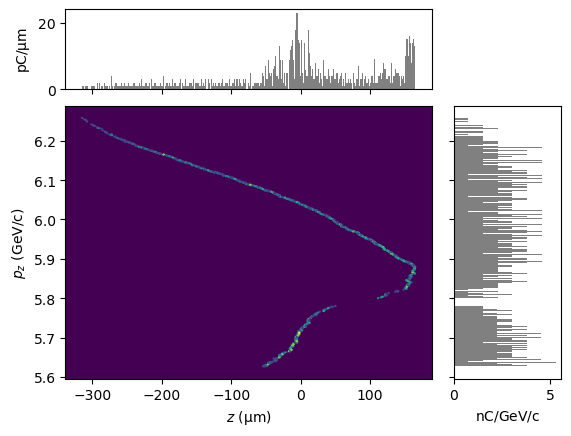

-14 -40
[-0.017200000000000017, 4.0969516220645434e-05]
1.6007072e-09


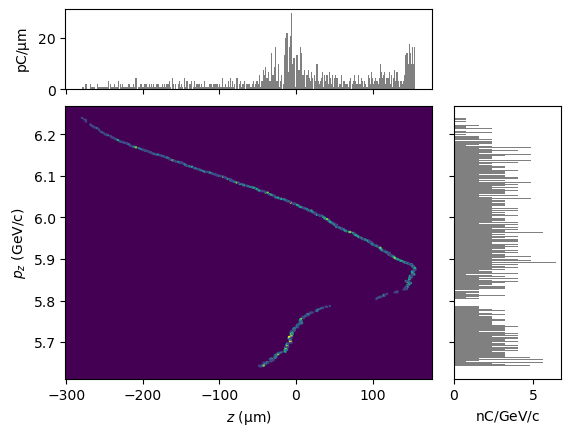

-14 -38
[-0.014700000000000032, 3.773845047077404e-05]
1.6007072e-09


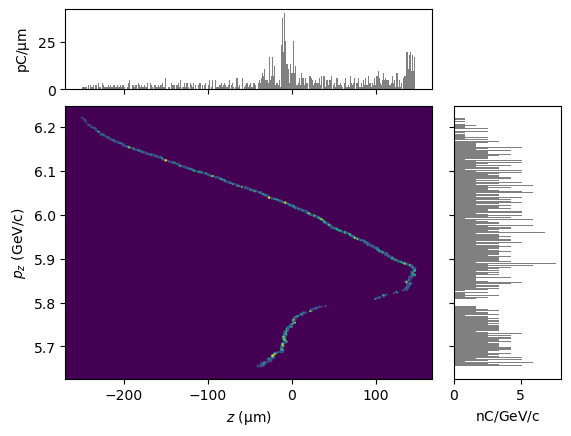

-14 -36
[-0.01190000000000005, 4.080722567533388e-05]
1.6007072e-09


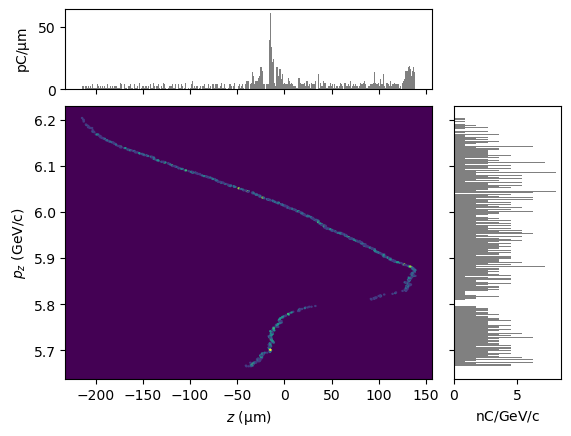

-14 -34
[-0.009000000000000067, 4.072456206725416e-05]
1.6007072e-09


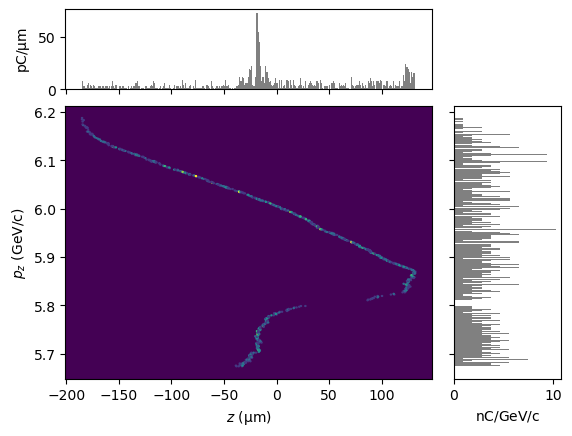

-14 -32
[-0.005000000000000091, 4.1538782960490436e-05]
1.6007072e-09


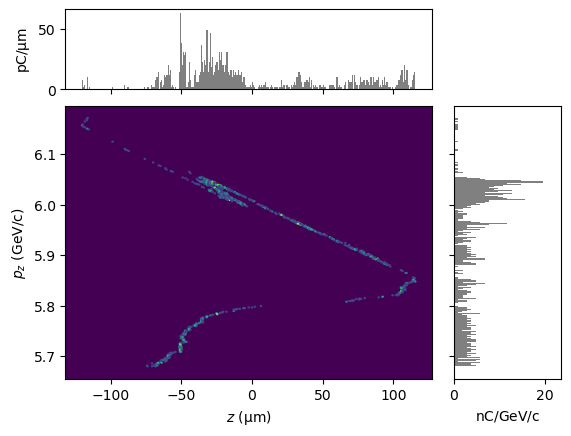

-14 -30
[-0.0026000000000001057, 4.002160170625868e-05]
1.6007072e-09


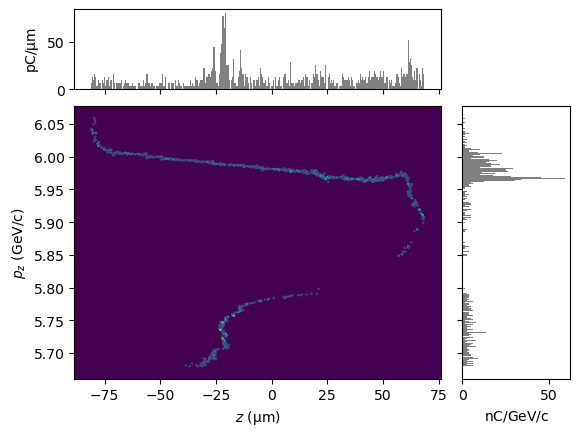

-14 -28
[0.0006999999999998743, 4.1287302415777065e-05]
1.6007072e-09


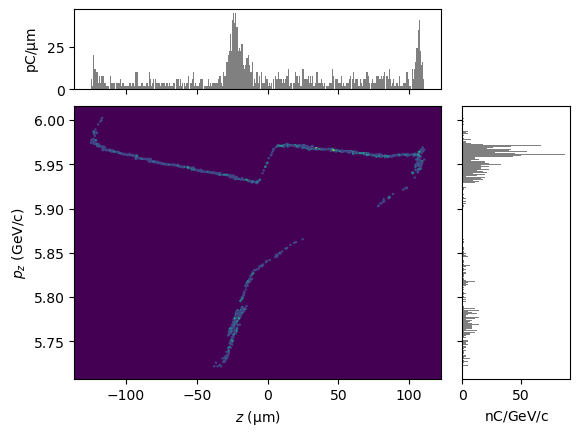

-14 -26
[0.008899999999999825, 4.073715166886383e-05]
1.6007072e-09


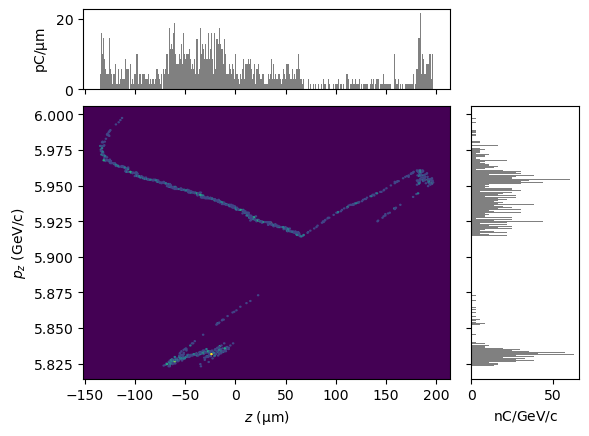

-14 -24
-14 -22
-14 -20
-14 -18
-14 -16
-14 -14
-14 -12
-14 -10
-14 -8
-14 -6
-14 -4
-14 -2
-12 -50
-12 -48
-12 -46
-12 -44
-12 -42
-12 -40
[-0.01830000000000001, 4.205738645586722e-05]
1.6007072e-09


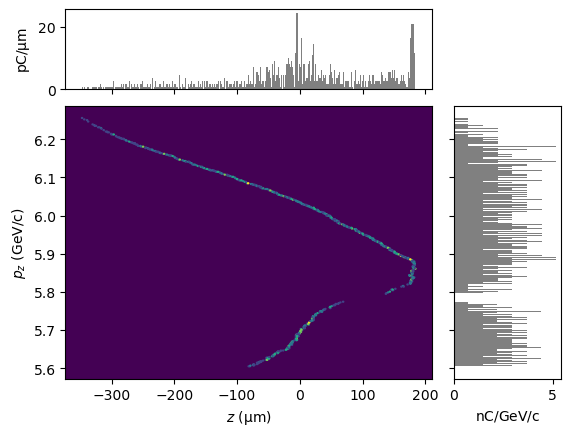

-12 -38
[-0.015800000000000026, 3.8370130887281834e-05]
1.6007072e-09


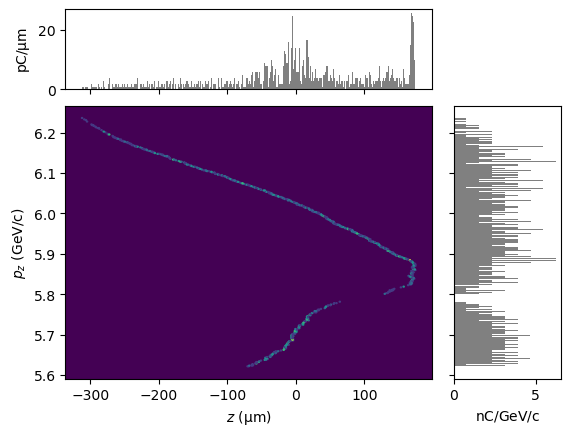

-12 -36
[-0.013000000000000043, 4.114508948508655e-05]
1.6007072e-09


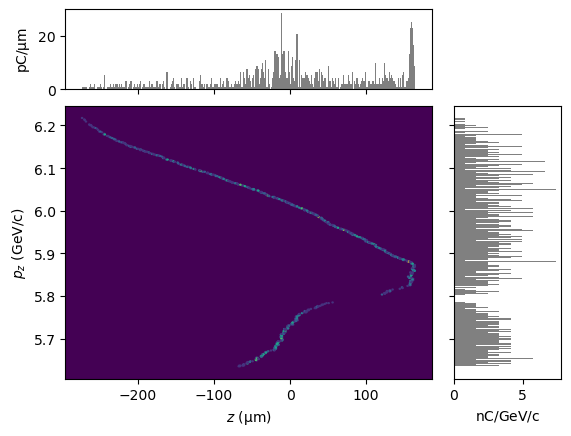

-12 -34
[-0.01010000000000006, 4.0935782853786815e-05]
1.6007072e-09


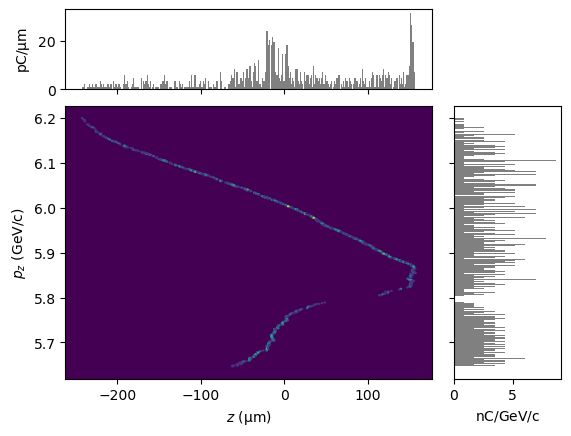

-12 -32
[-0.005900000000000086, 3.906276462557416e-05]
1.6007072e-09


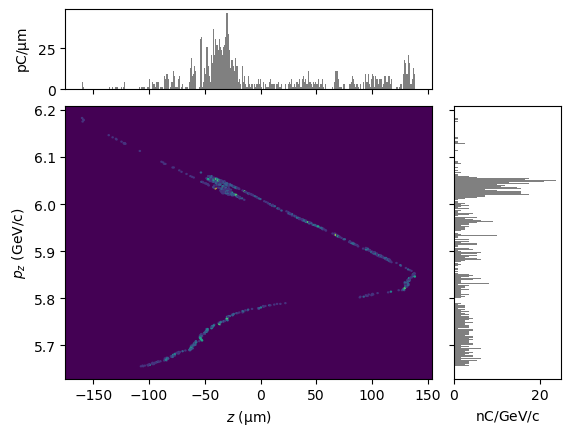

-12 -30
[-0.0036000000000000996, 3.8362151683279547e-05]
1.6007072e-09


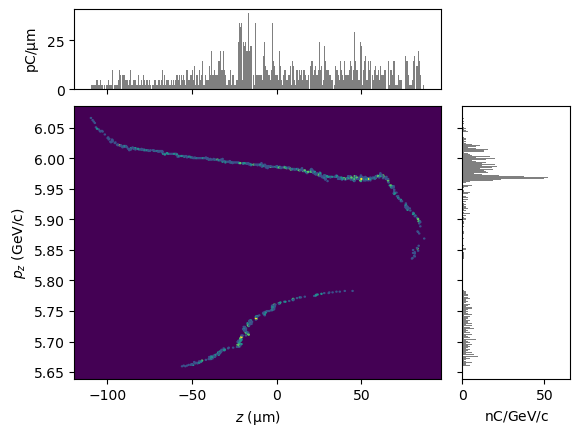

-12 -28
[-0.0003000000000001196, 4.04291099757164e-05]
1.6007072e-09


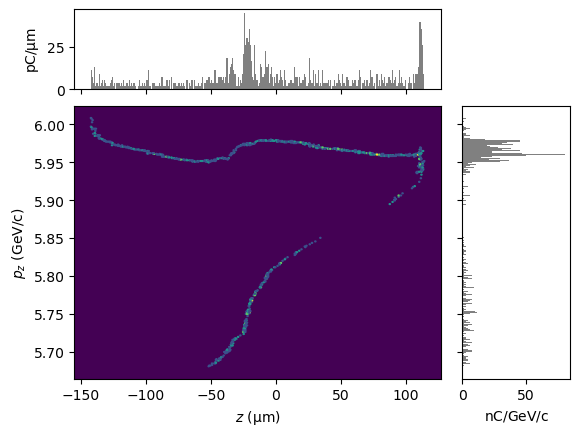

-12 -26
[0.0057999999999998435, 3.904995338355125e-05]
1.6007072e-09


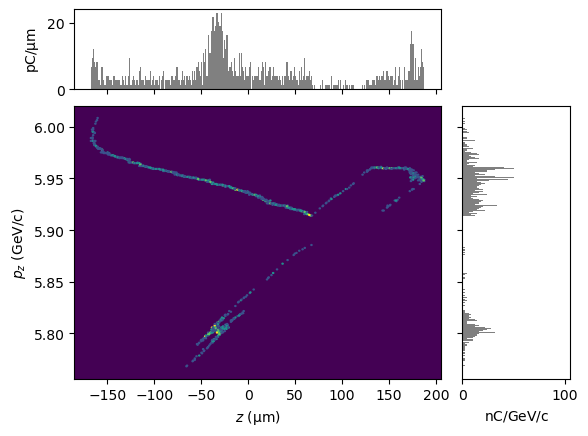

-12 -24
[0.016599999999999778, 3.922354661822496e-05]
1.6007072e-09


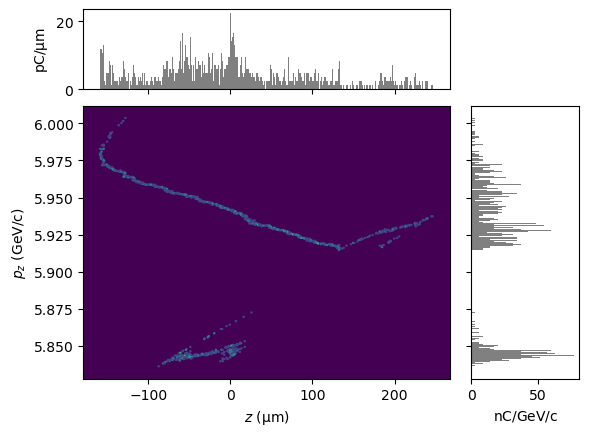

-12 -22
-12 -20
-12 -18
-12 -16
-12 -14
-12 -12
-12 -10
-12 -8
-12 -6
-12 -4
-12 -2
-10 -50
-10 -48
-10 -46
-10 -44
-10 -42
-10 -40
[-0.019300000000000005, 4.0821065176814217e-05]
1.6007072e-09


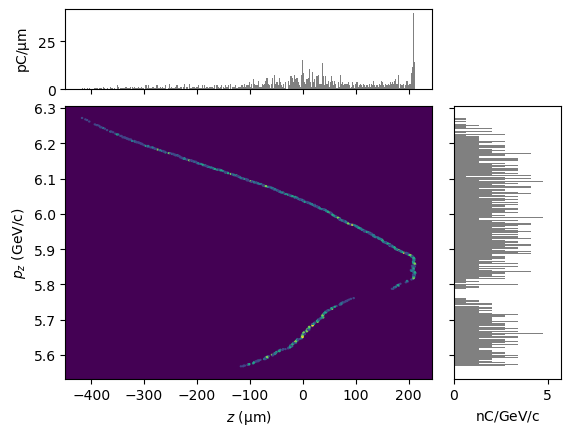

-10 -38
[-0.01670000000000002, 4.2610206968890106e-05]
1.6007072e-09


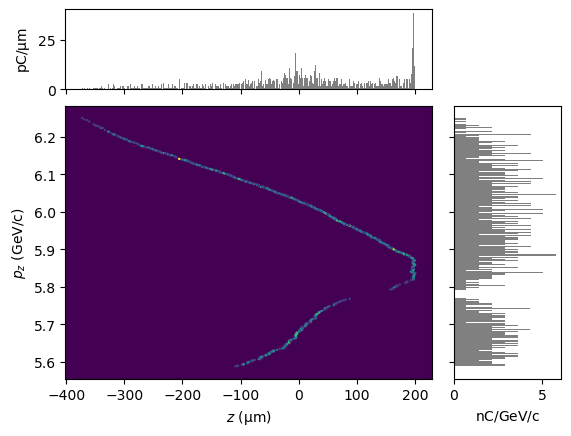

-10 -36
[-0.014000000000000037, 3.960618221701174e-05]
1.6007072e-09


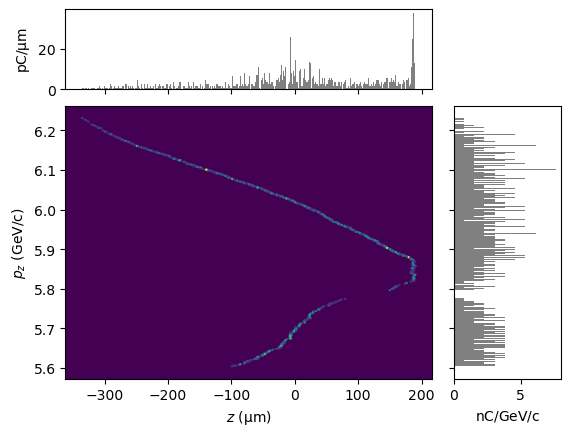

-10 -34
[-0.011100000000000054, 3.8709689045494244e-05]
1.6007072e-09


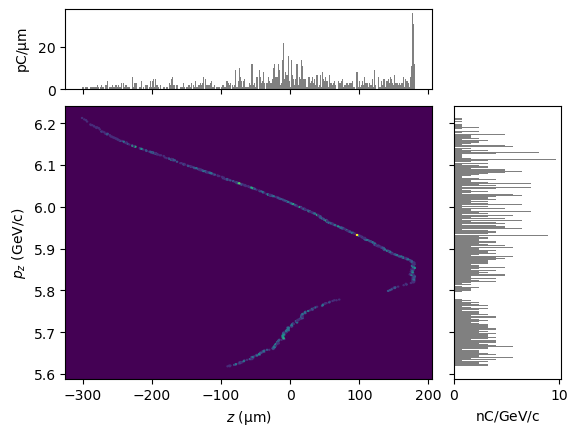

-10 -32
[-0.006700000000000081, 4.1287698912428135e-05]
1.6007072e-09


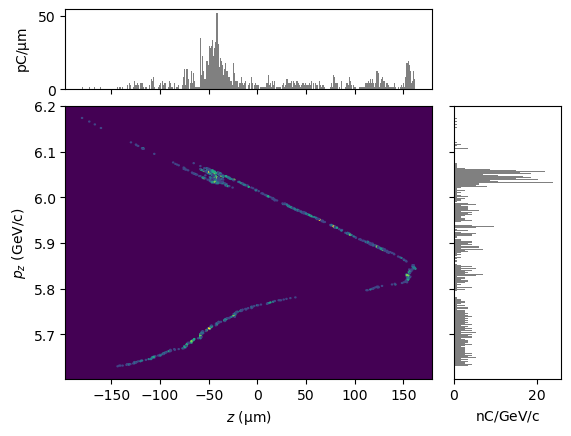

-10 -30
[-0.004400000000000095, 4.0834498253510196e-05]
1.6007072e-09


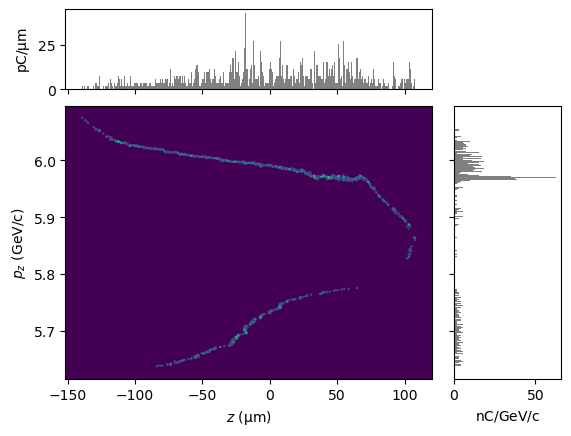

-10 -28
[-0.0011000000000001148, 4.007971119240723e-05]
1.6007072e-09


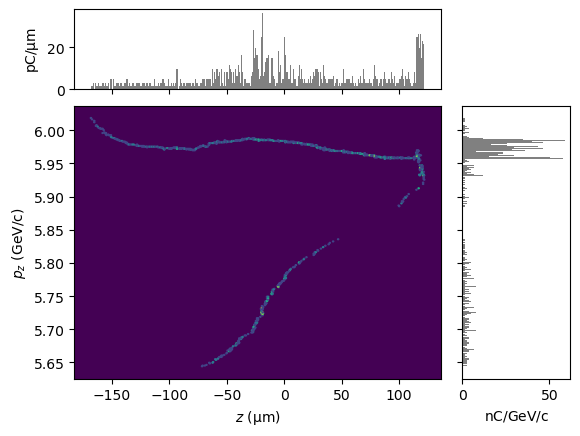

-10 -26
[0.004199999999999853, 4.128857467532602e-05]
1.6007072e-09


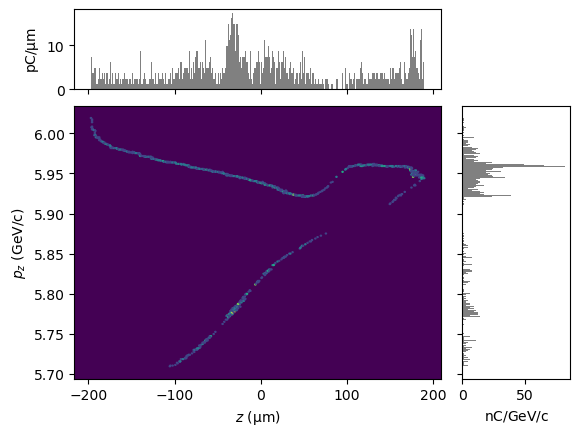

-10 -24
[0.0129999999999998, 4.004635746044878e-05]
1.6007072e-09


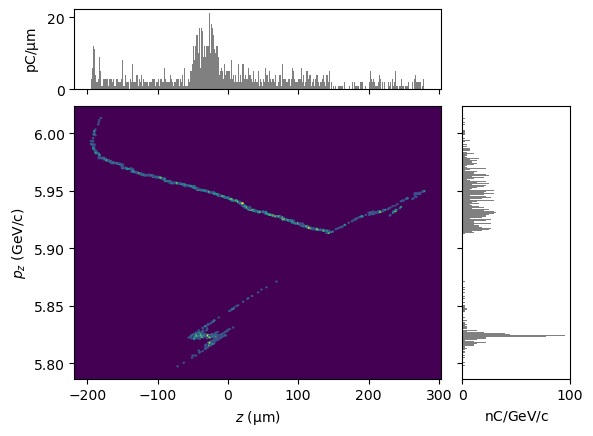

-10 -22
-10 -20
-10 -18
-10 -16
-10 -14
-10 -12
-10 -10
-10 -8
-10 -6
-10 -4
-10 -2
-8 -50
-8 -48
-8 -46
-8 -44
-8 -42
-8 -40
-8 -38
[-0.017600000000000015, 4.0506698142494114e-05]
1.6007072e-09


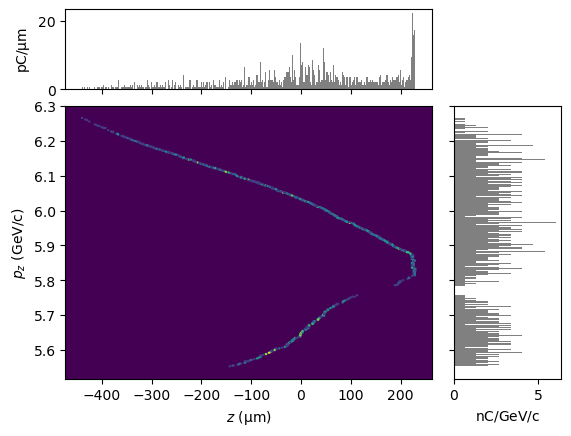

-8 -36
[-0.014900000000000031, 3.7357512804689434e-05]
1.6007072e-09


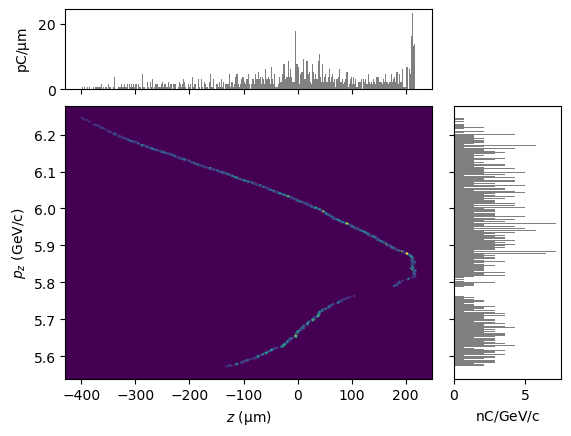

-8 -34
[-0.01190000000000005, 4.202826695708174e-05]
1.6007072e-09


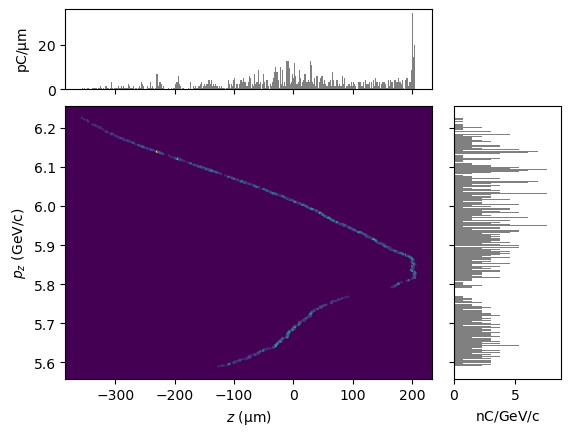

-8 -32
[-0.007500000000000076, 3.769936614824313e-05]
1.6007072e-09


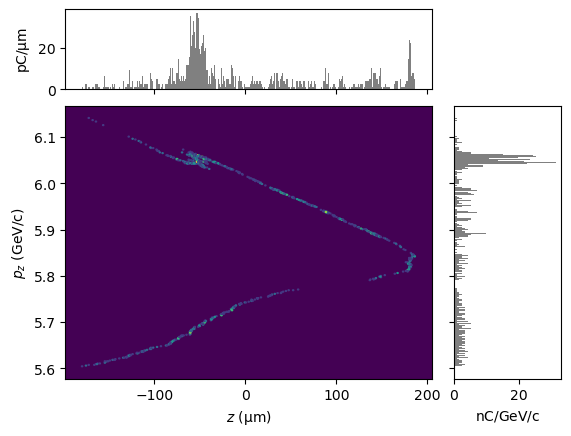

-8 -30
[-0.00520000000000009, 4.0260227287840144e-05]
1.6007072e-09


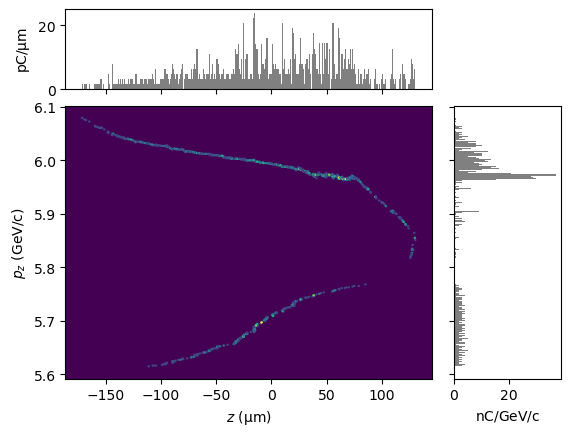

-8 -28
[-0.0018000000000001105, 3.860711018594555e-05]
1.6007072e-09


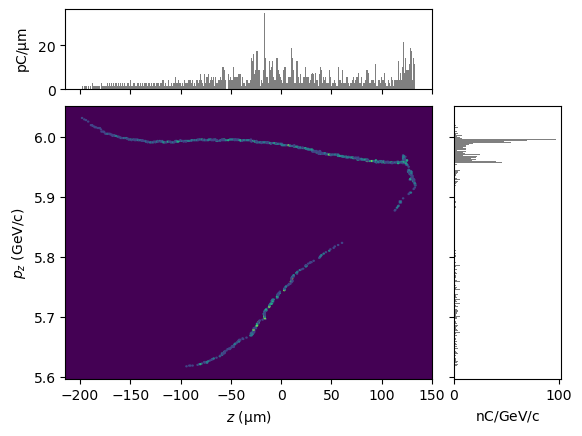

-8 -26
[0.0029999999999998604, 4.114977732726424e-05]
1.6007072e-09


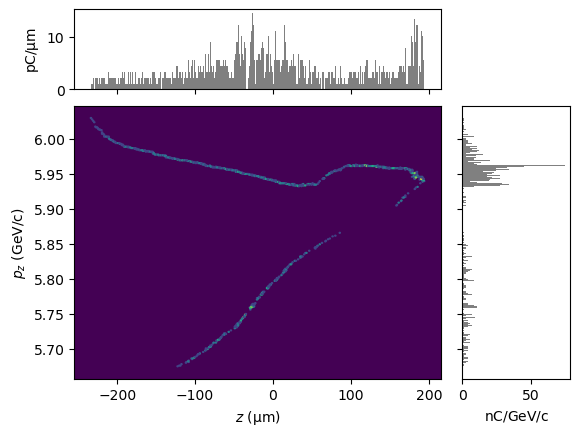

-8 -24
[0.010599999999999814, 4.063129647545443e-05]
1.6007072e-09


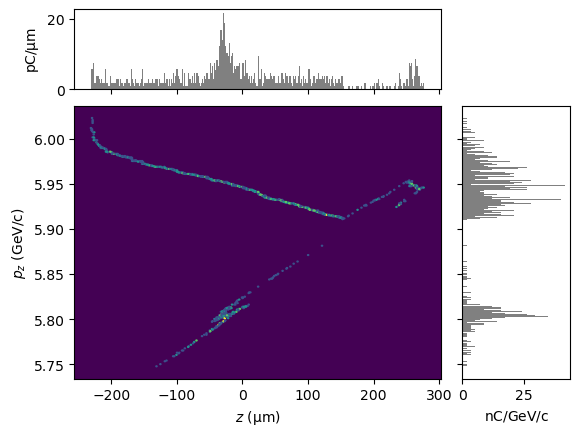

-8 -22
-8 -20
-8 -18
-8 -16
-8 -14
-8 -12
-8 -10
-8 -8
-8 -6
-8 -4
-8 -2
-6 -50
-6 -48
-6 -46
-6 -44
-6 -42
-6 -40
-6 -38
[-0.01840000000000001, 3.923275577113984e-05]
1.6007072e-09


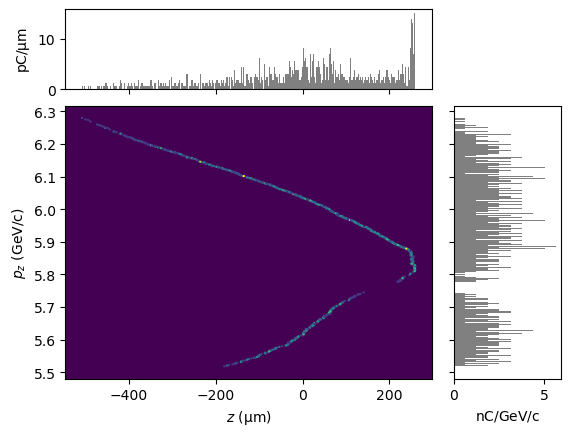

-6 -36
[-0.015700000000000026, 3.7282480163844205e-05]
1.6007072e-09


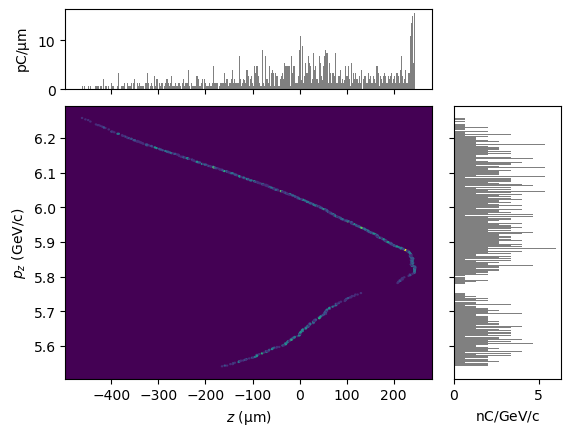

-6 -34
[-0.012700000000000045, 4.032820933430316e-05]
1.6007072e-09


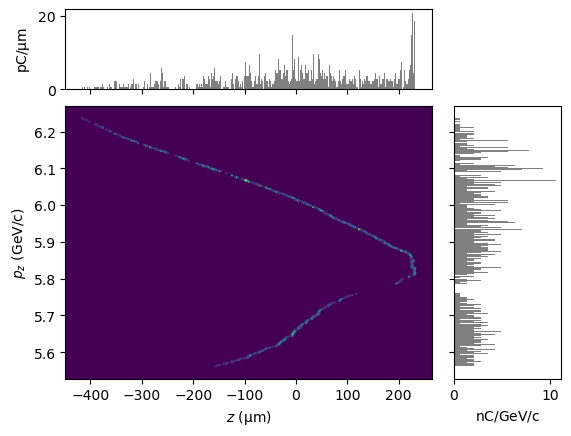

-6 -32
[-0.008100000000000072, 4.310219837810479e-05]
1.6007072e-09


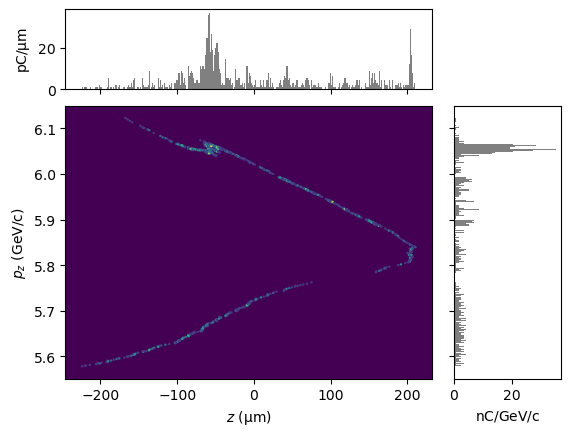

-6 -30
[-0.005900000000000086, 4.0594351202176375e-05]
1.6007072e-09


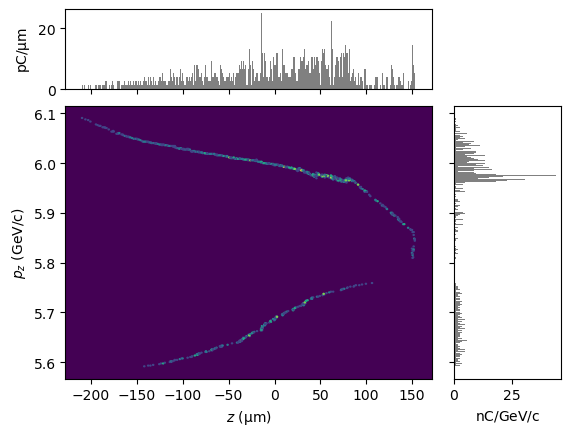

-6 -28
[-0.002400000000000107, 3.913736114913256e-05]
1.6007072e-09


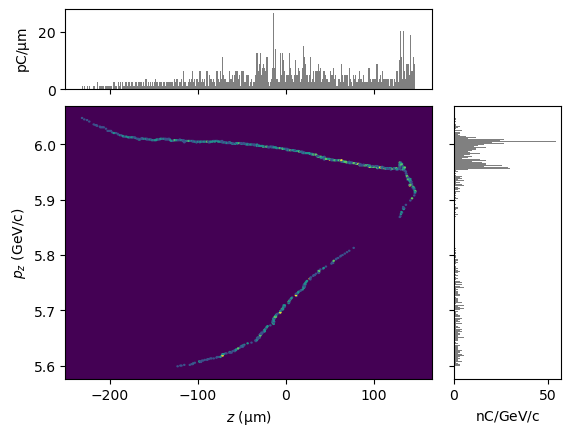

-6 -26
[0.0017999999999998677, 3.941357299896622e-05]
1.6007072e-09


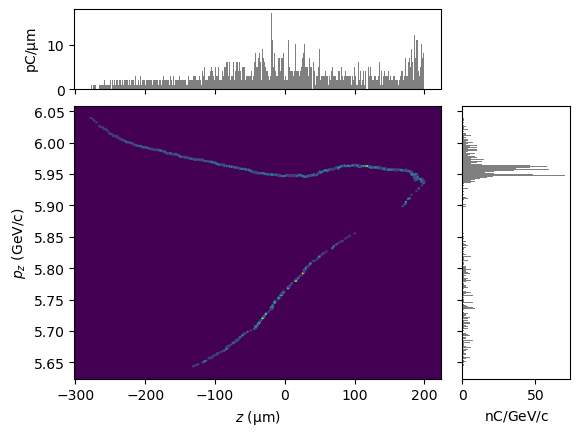

-6 -24
[0.009199999999999823, 3.87794290465742e-05]
1.6007072e-09


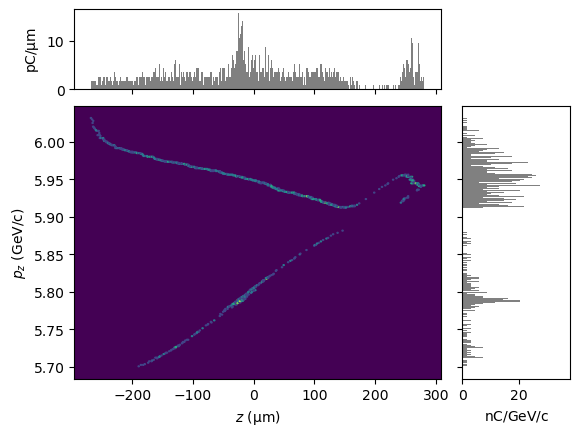

-6 -22
[0.019299999999999762, 4.104124693424904e-05]
1.6007072e-09


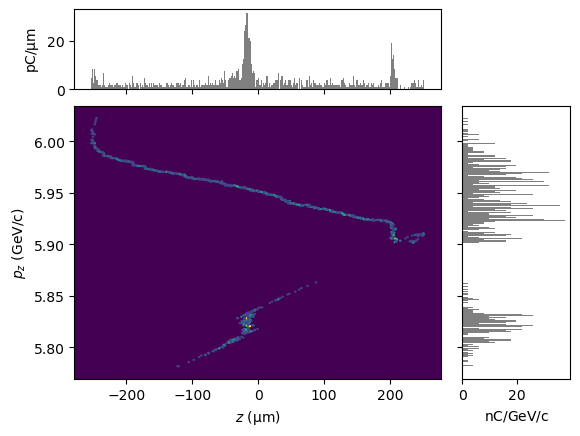

-6 -20
-6 -18
-6 -16
-6 -14
-6 -12
-6 -10
-6 -8
-6 -6
-6 -4
-6 -2
-4 -50
-4 -48
-4 -46
-4 -44
-4 -42
-4 -40
-4 -38
[-0.019100000000000006, 3.9757406542961316e-05]
1.6007072e-09


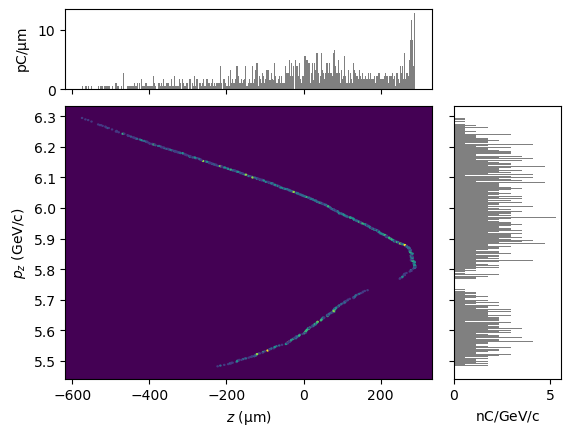

-4 -36
[-0.016400000000000022, 3.9089884468720504e-05]
1.6007072e-09


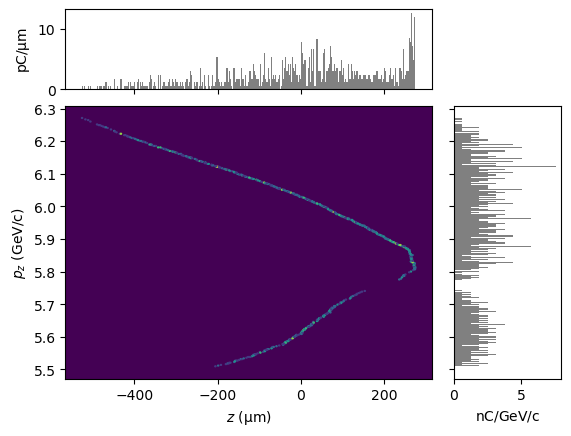

-4 -34
[-0.01340000000000004, 4.215655998810684e-05]
1.6007072e-09


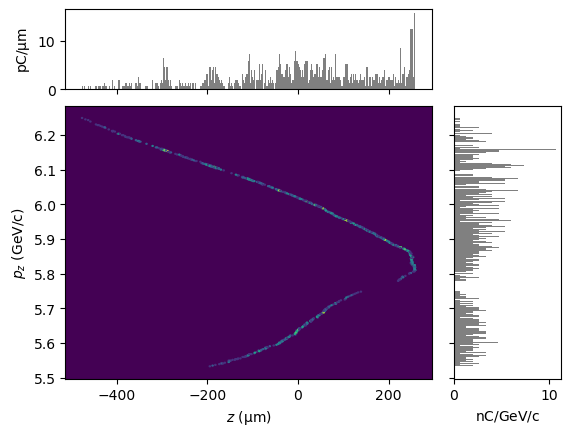

-4 -32
[-0.008800000000000068, 3.862927198453511e-05]
1.6007072e-09


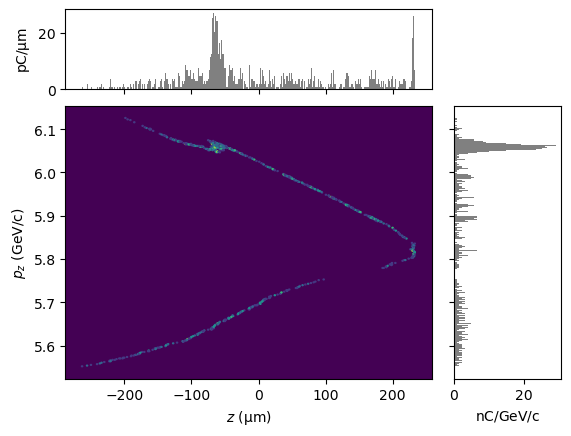

-4 -30
[-0.0066000000000000815, 3.761646209478995e-05]
1.6007072e-09


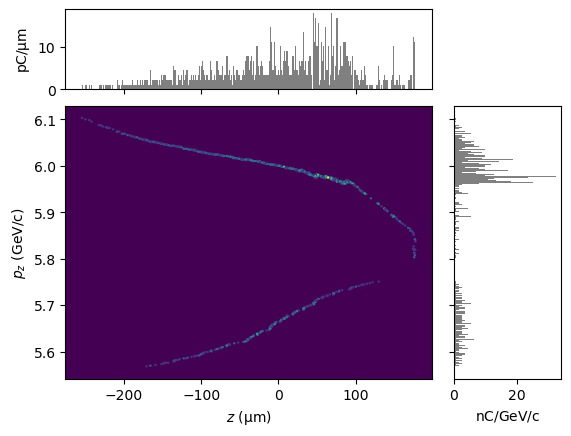

-4 -28
[-0.002900000000000104, 4.26145953360093e-05]
1.6007072e-09


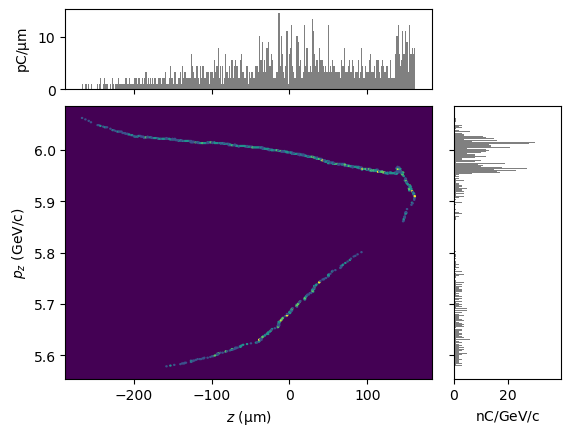

-4 -26
[0.0009999999999998725, 4.043388176555408e-05]
1.6007072e-09


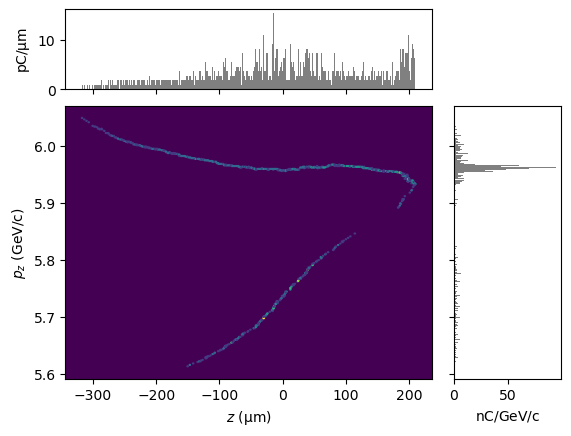

-4 -24
[0.007699999999999832, 3.9368976154205685e-05]
1.6007072e-09


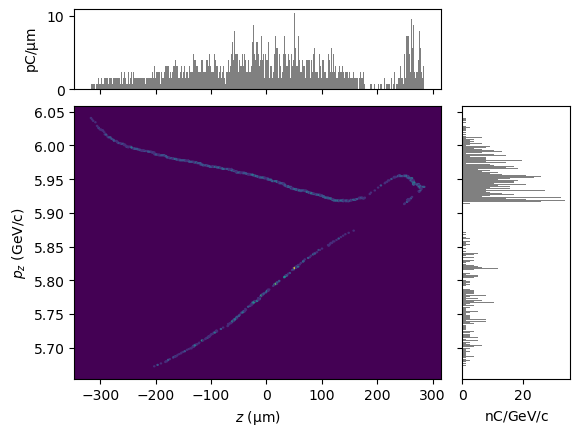

-4 -22
[0.017299999999999774, 4.053147995310441e-05]
1.6007072e-09


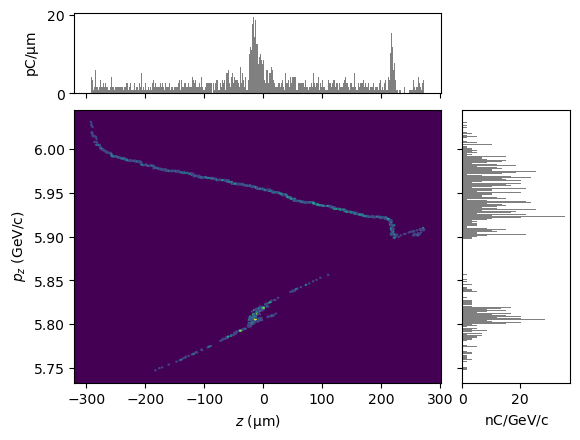

-4 -20
-4 -18
-4 -16
-4 -14
-4 -12
-4 -10
-4 -8
-4 -6
-4 -4
-4 -2
-2 -50
-2 -48
-2 -46
-2 -44
-2 -42
-2 -40
-2 -38
[-0.0198, 3.6390018365894494e-05]
1.6007072e-09


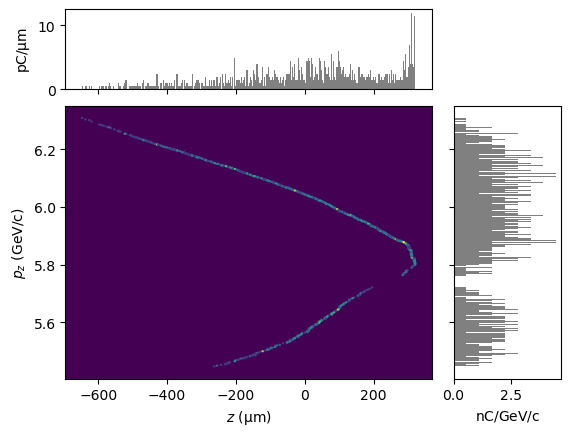

-2 -36
[-0.01700000000000002, 4.283578883881021e-05]
1.6007072e-09


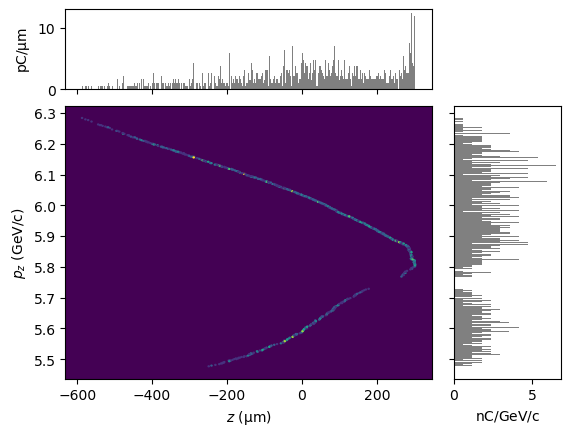

-2 -34
[-0.014100000000000036, 4.1183118106494015e-05]
1.6007072e-09


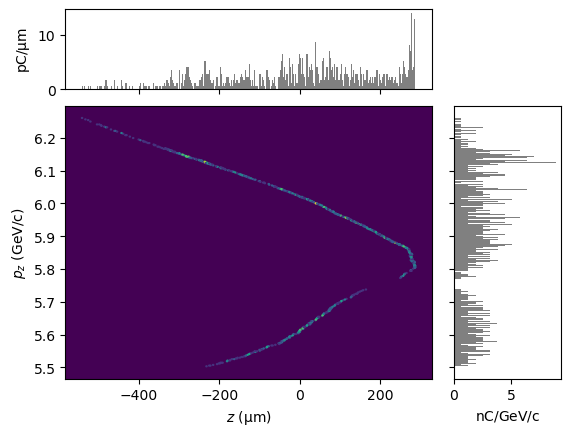

-2 -32
[-0.009400000000000065, 3.953356520032509e-05]
1.6007072e-09


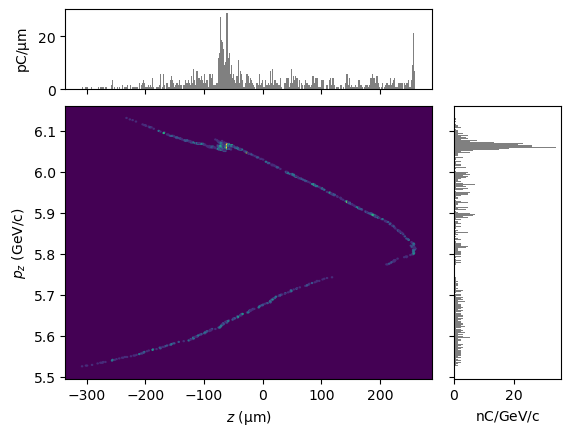

-2 -30
[-0.007200000000000078, 3.748008008242943e-05]
1.6007072e-09


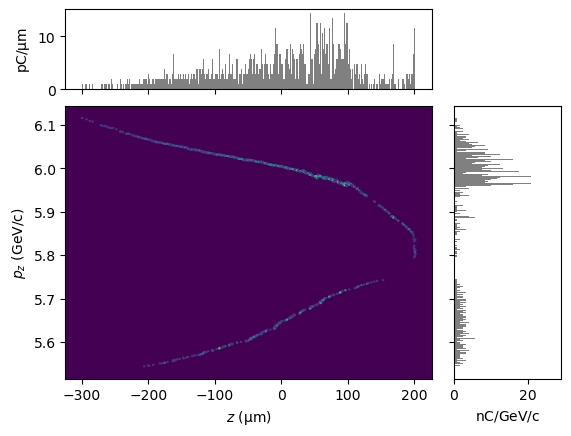

-2 -28
[-0.0035000000000001003, 3.8492239955710904e-05]
1.6007072e-09


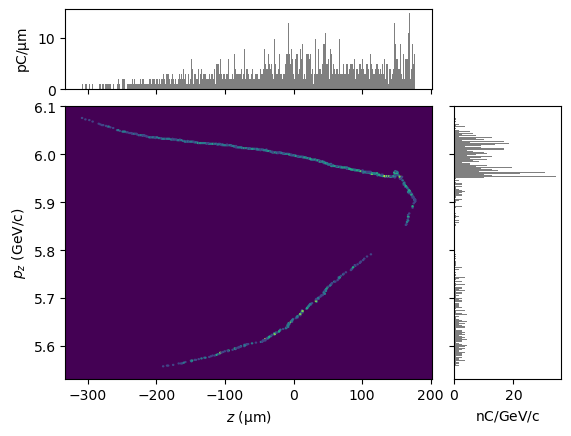

-2 -26
[0.00029999999999987675, 3.8807471918711394e-05]
1.6007072e-09


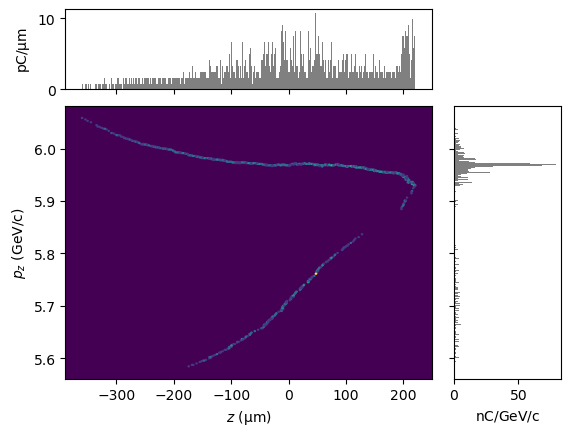

-2 -24
[0.006599999999999839, 3.974592873004094e-05]
1.6007072e-09


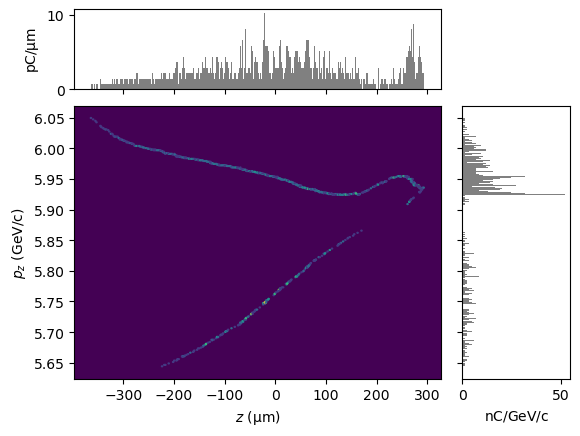

-2 -22
[0.015999999999999782, 4.1244512533853615e-05]
1.6007072e-09


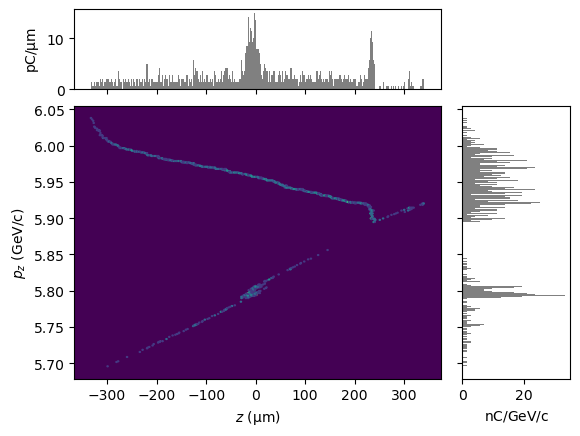

-2 -20
-2 -18
-2 -16
-2 -14
-2 -12
-2 -10
-2 -8
-2 -6
-2 -4
-2 -2


In [8]:
for L1PhaseSet in np.arange(-40, 0, 2):
    for L2PhaseSet in np.arange(-50, 0 , 2):
        print(L1PhaseSet, L2PhaseSet)
        
        
        #Set phases and track to BC20
        
        activeSettings = importedDefaultSettings | { "L1PhaseSet" : L1PhaseSet, "L2PhaseSet" : L2PhaseSet }
        
        setLattice(tao, **activeSettings)
        trackBeam(tao, trackEnd = "BEGBC20", **activeSettings)
        P = getBeamAtElement(tao, "BEGBC20")
        
        results = []

        #Find optimal R56
        
        for R56Set in np.arange( -20e-3, 20e-3, 0.1e-3):
            PMod = P.copy()
            
            meanPz = np.mean( PMod.pz ) 
            PMod.z = PMod.z + ( R56Set ) * ( PMod.pz - meanPz ) / meanPz
            
            #display(plotMod(PMod, 'z', 'pz', bins=300))
            #plt.clf()
            
            PDrive, PWitness = getDriverAndWitness(PMod)
            #print( 1e6 * (np.median(PDrive.z) - np.median(PWitness.z)) )
        
            results.append( [ R56Set, np.median(PDrive.z) - np.median(PWitness.z) ] ) 
        
        targetSpacing = 40e-6
        bestResult = min(results, key=lambda x: ( x[1] - targetSpacing ) ** 2)

        
        bestR56, bestSpacing = bestResult

        #Only show results which are within the allowed R56 range
        if abs(bestSpacing - targetSpacing) < 10e-6: 
            PMod = P.copy()
                
            meanPz = np.mean( PMod.pz ) 
            PMod.z = PMod.z + ( bestR56 ) * ( PMod.pz - meanPz ) / meanPz
    
            print(bestResult)
            print(PMod.charge)
            display(plotMod(PMod, 'z', 'pz', bins=300))
            plt.clf()